# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohl být nějaký vztah (např. korelace) a popište tento vztah pomocí bivariačních deskriptivních statistik. Dvojice typu Age upon Intake a Age upon Outcome neuznáváme.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

# 1. Data Preparation

In [1213]:
# packages imports
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import math


In [1214]:
df_intakes = pd.read_csv("intakes.csv")
df_outcomes = pd.read_csv("outcomes.csv")
# df_locations = pd.read_csv("locations.csv") # wasn't used

## 1.1 Understanding The Data

### Intakes Dataset

#### General Description

##### 1. First Glance

In [1215]:
# let's quickly see the data
display(df_intakes.head(3))
display(df_intakes.tail(3))

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
138582,A855815,A855815,04/23/2022 01:32:00 PM,April 2022,4414 Dove Dr in Austin (TX),Stray,Normal,Dog,Intact Female,2 months,Labrador Retriever Mix,Brown/Black
138583,A855818,*Pumbaa,04/23/2022 02:44:00 PM,April 2022,10827 Fm 1820 in Travis (TX),Stray,Normal,Dog,Intact Male,3 years,Anatol Shepherd/German Shepherd,Brown
138584,A854552,Coco,04/21/2022 12:24:00 PM,April 2022,641 Tillery Street in Austin (TX),Stray,Normal,Dog,Intact Female,9 months,Pit Bull Mix,Black/White


We have following columns:

- **Animal ID** - identification number of the animal
- **Name** - Name of the animal that was taken to the shelter
- **DateTime** - When the animal was taked to the shelter
- **MonthYear** - The year when the animal was taken to the shelter
- **Found Location** - Where the animal was upon its intake to the shelter
- **Intake Type** - for example if animal was stray or from wildlife
- **Intake Condition** - condition of the animal upon its intake - if it was ill or had some other issues, or was normal
- **Animal Type** - if it was a dog, cat etc..
- **Sex upon Intake** - female or male, but also with inforamtion if it was neutered (for male) or spayed (for female)
- **Age upon Intake** - how old the animal was upon the intake
- **Breed** - for example labrador, pit bull etc.
- **Color** - for example brown or brown/black if it is a combination of colors

Before we will look upon each column more thoroughly, lets look at the general information about the dataset

##### 2. Dataset Info

In [1216]:
# let's see some basic information about the dataset
df_intakes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


1. There are **138 585 rows**

2. There are **12 columns**, each of them is of type **object**. Later we will see that all of them are 
strings.

3. Column **Name** has a lot of missing values - **97 316 are non-null**.

4. **Sex upon Intake** column has only one missing value. 

5. Other columns have no null values, but it doesn't mean there are no missing values in them (for example empty string, "unknown", "missing", etc.)

6. Size of the dataset is **12.7 MB**. We will improve the size later.

##### 3. Dataset Description



In [1217]:
df_intakes_desc = df_intakes.describe()
df_intakes_desc

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
count,138585,97316,138585,138585,138585,138585,138585,138585,138584,138585,138585,138585
unique,123890,23544,97442,103,58367,6,15,5,5,54,2741,616
top,A721033,Max,09/23/2016 12:00:00 PM,June 2015,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,624,64,2189,26051,95283,119320,78145,45635,23667,32194,14470


**count** - number of non-null rows.

**unique** represents the number of unique values in the column, including NaN.

  - **Animal ID** column has less unique values that in count. This means that some animals were intaken more than once.
  
  - **Name** column has a very small amount of unique values, which is not suprising, because people often use very common names, like Max, which is the most frequent name in the dataset.

  - **Intake Type, Intake Condition, Animal Type, Sex upon Intake, Age upon Intak, Breed, Color** columns have a very small amount of unique values, because they are categorical, and can be converted to category data type.

**top** row represents the most frequent value among all rows for each column and the **freq** row represents actually how many times was the top value in the column.

- For example, we can see that the most frequent name is Max and there are 624 Maxes

- The most frequent type of intaken animal is Dog (78145 dogs). Also the most frequent intake type is Stray (95283 are stray).

- Also it is interesting that the same animal with ID A721033 was intaken to the shelter 33 times.

#### Columns Analysis

Now let's inspect some columns thoroughly and find deeper insights.

##### 1. Animal ID
***

In [1218]:
df_intakes_desc['Animal ID']

count      138585
unique     123890
top       A721033
freq           33
Name: Animal ID, dtype: object

We see that there are no null-rows in this column.

But there are two interesting things:
1. Does every value starts with 'A'? What this prefix 'A' means? Can we just remove it and convert our column to integer, so we can improve space complexity and time complexity of further calculations with this column?
2. Also, what is that interesting A721033 animal, which was intaken 33 times?

Answering the first question:

In [1219]:
animal_ids = df_intakes["Animal ID"]
animal_ids.str.startswith('A').sum()

138585

Each Animal ID starts with 'A' prefix, we can remove this prefix later and convert Animal ID to integer data type.

Answering the second question:

In [1220]:
top_animal_id = 'A721033'
df_intakes[df_intakes['Animal ID'] == top_animal_id].head(5)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
4062,A721033,Lil Bit,02/24/2019 09:53:00 PM,February 2019,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle
10565,A721033,Lil Bit,03/07/2018 08:27:00 AM,March 2018,4111 South 1St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,2 years,Rat Terrier Mix,Tricolor/Brown Brindle
12736,A721033,Lil Bit,05/20/2019 10:18:00 AM,May 2019,1819 South Pleasant Valley Road in Austin (TX),Public Assist,Normal,Dog,Neutered Male,4 years,Rat Terrier Mix,Tricolor/Brown Brindle
13209,A721033,Lil Bit,04/05/2018 05:59:00 PM,April 2018,9705 Manchaca Road in Austin (TX),Public Assist,Normal,Dog,Neutered Male,2 years,Rat Terrier Mix,Tricolor/Brown Brindle
20090,A721033,Lil Bit,09/24/2018 07:44:00 PM,September 2018,Shady And Airport in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle


We can see, that this is the **Lil Bit dog** that was intaken 33 times.

Another interesing insight:

A lot of animals, which don't have names have Neonatal intake condition or Stray intake type. This can be the reason why there are so many missing names.

In [1221]:
df_intakes[df_intakes['Name'].isna()].head(3)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
9,A818975,NaN,06/18/2020 02:53:00 PM,June 2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Cream Tabby
10,A774147,NaN,06/11/2018 07:45:00 AM,June 2018,6600 Elm Creek in Austin (TX),Stray,Injured,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Black/White


In [1222]:
df_intakes[df_intakes['Name'].isna() & (df_intakes['Intake Condition'] == 'Neonatal') ].head(3)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
2658,A842807,NaN,09/21/2021 05:45:00 PM,September 2021,8127 Mesa Drive in Austin (TX),Stray,Neonatal,Cat,Intact Male,2 days,Domestic Shorthair,Orange
7280,A842038,NaN,09/08/2021 01:07:00 PM,September 2021,William Cannon And Stoneleigh in Austin (TX),Stray,Neonatal,Cat,Intact Male,3 weeks,Domestic Shorthair,Blue Tabby
7827,A843856,NaN,10/07/2021 11:44:00 AM,October 2021,Austin (TX),Owner Surrender,Neonatal,Dog,Intact Female,6 days,Black Mouth Cur Mix,Chocolate


##### 2. Name
***

In [1223]:
df_intakes['Name'].head(5)

0     *Brock
1      Belle
2    Runster
3        NaN
4        Rio
Name: Name, dtype: object

Questions:
1. What means the '*' prefix in front of certain names? Can we just delete it?

In [1224]:
filtered = df_intakes['Name'].str.startswith('*')
filtered.fillna(value=False, inplace=True)
print(f"Number of names which start with the star '*' character: {filtered.sum()}")

starred_animals = df_intakes[filtered]
starred_animals.head()

Number of names which start with the star '*' character: 32366


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
7,A844350,*Ella,10/15/2021 11:40:00 AM,October 2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,6 months,Domestic Shorthair,Brown Tabby
11,A731435,*Casey,08/08/2016 05:52:00 PM,August 2016,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,5 months,Domestic Shorthair Mix,Cream Tabby
13,A707375,*Candy Cane,07/11/2015 06:19:00 PM,July 2015,Galilee Court And Damita Jo Dr in Manor (TX),Stray,Normal,Dog,Intact Female,5 months,Pit Bull,Brown/White
14,A696408,*Pearl,02/04/2015 12:58:00 PM,February 2015,9705 Thaxton in Austin (TX),Stray,Normal,Dog,Intact Female,2 years,Chihuahua Shorthair,Tricolor


Does the star mean that the animmal is Normal?

In [1225]:
starred_normal = (starred_animals['Intake Condition'] == 'Normal')
starred_normal.sum()

28407

Now, we see that not all starred animals are normal.

In [1226]:
df_intakes[df_intakes['Name'].isin(['Timon', '*Timon'])].head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
29354,A823752,*Timon,09/29/2020 04:34:00 PM,September 2020,Austin (TX),Owner Surrender,Normal,Cat,Intact Male,4 months,Domestic Shorthair,Orange Tabby
41033,A792519,Timon,04/11/2019 04:57:00 PM,April 2019,Austin (TX),Owner Surrender,Normal,Dog,Intact Male,2 months,Chihuahua Longhair/Dachshund,Tan
43127,A765108,Timon,01/13/2018 11:31:00 AM,January 2018,Braker Lane And Dessau Road in Austin (TX),Stray,Normal,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Black
65777,A720643,Timon,02/13/2016 11:55:00 AM,February 2016,Austin (TX),Public Assist,Normal,Dog,Intact Male,8 months,Queensland Heeler Mix,Blue Merle
109972,A812672,Timon,01/26/2020 01:21:00 PM,January 2020,Austin (TX),Owner Surrender,Sick,Cat,Unknown,13 years,Domestic Shorthair Mix,White/Calico


It doesn't look like the '*' means something. This can have some impact on the Name column statistics.

Let's inspect another problem - names starting with '#'

In [1227]:
filtered = df_intakes['Name'].str.startswith('#')
filtered.fillna(value=False, inplace=True)
print(f"Number of names which start with the hashtag '#' character: {filtered.sum()}")
hashtag_animals = df_intakes[filtered]
hashtag_animals.head()

Number of names which start with the hashtag '#' character: 19


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
186,A784391,#9 Cassidy,11/15/2018 05:09:00 PM,November 2018,13408 Frostdale Dr in Travis (TX),Public Assist,Nursing,Dog,Intact Female,0 years,Pit Bull Mix,Blue/White
15190,A788181,#2,01/27/2019 05:45:00 PM,January 2019,Austin (TX),Stray,Normal,Dog,Intact Male,0 years,Pit Bull Mix,White/Brown
22576,A784385,#3 Athena,11/15/2018 05:09:00 PM,November 2018,13408 Frostdale Dr in Travis (TX),Public Assist,Nursing,Dog,Intact Female,0 years,Pit Bull Mix,Black/White
32073,A784382,#1,11/15/2018 05:09:00 PM,November 2018,13408 Frostdale Dr in Travis (TX),Public Assist,Nursing,Dog,Intact Female,0 years,Pit Bull Mix,Black/White
41395,A784388,#6 Ivy,11/15/2018 05:09:00 PM,November 2018,13408 Frostdale Dr in Travis (TX),Public Assist,Nursing,Dog,Intact Female,0 years,Pit Bull Mix,White/Blue


What about empty strings?

In [1228]:
(df_intakes['Name'] == '').sum()

0

There is no names that are just empty strings.

##### 3. Found Location
***

In [1229]:
df_intakes_desc['Found Location']

count          138585
unique          58367
top       Austin (TX)
freq            26051
Name: Found Location, dtype: object

In [1230]:
df_intakes['Found Location'].head(5)

0    2501 Magin Meadow Dr in Austin (TX)
1       9409 Bluegrass Dr in Austin (TX)
2     2818 Palomino Trail in Austin (TX)
3                            Austin (TX)
4          800 Grove Blvd in Austin (TX)
Name: Found Location, dtype: object

Interesting detail - Austin (TX) location is the most frequent, but it doesn't say much about precise location. **It looks like it could represent missing location.** We could replace it with NaN to indicate that more clearly. Also removing Austion (TX) suffix will improve dataset size.

In [1231]:
missing_location = df_intakes['Found Location'] == "Austin (TX)"
df_missing_locations = df_intakes[missing_location]
df_missing_locations.head(5)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
5,A743852,Odin,02/18/2017 12:46:00 PM,February 2017,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate
8,A708452,Mumble,07/30/2015 02:37:00 PM,July 2015,Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Labrador Retriever Mix,Black/White
11,A731435,*Casey,08/08/2016 05:52:00 PM,August 2016,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,5 months,Domestic Shorthair Mix,Cream Tabby
17,A657188,Tommy,11/10/2013 05:19:00 PM,November 2013,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,14 years,Domestic Shorthair Mix,Brown Tabby/White


In [1232]:
print(f"Number of rows which have value 'Austin (TX)': {missing_location.sum()}")

Number of rows which have value 'Austin (TX)': 26051


**But lets see if there are some rows which don't end with 'Austin (TX)'**

In [1233]:
ends_with_austin = df_intakes['Found Location'].str.endswith('Austin (TX)')
ends_with_not_austin = ~ends_with_austin
df_not_austin = df_intakes[ends_with_not_austin]
df_not_austin.head(5)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
9,A818975,NaN,06/18/2020 02:53:00 PM,June 2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Cream Tabby
13,A707375,*Candy Cane,07/11/2015 06:19:00 PM,July 2015,Galilee Court And Damita Jo Dr in Manor (TX),Stray,Normal,Dog,Intact Female,5 months,Pit Bull,Brown/White
27,A810994,NaN,12/25/2019 12:05:00 AM,December 2019,7900 Rm 1826 Rd in Travis (TX),Wildlife,Normal,Other,Unknown,2 years,Bat,Brown
38,A794334,Pearl,09/02/2019 11:52:00 AM,September 2019,Outside Jurisdiction,Owner Surrender,Sick,Dog,Spayed Female,3 years,Boxer Mix,White
45,A769816,*Wallace,04/10/2018 04:46:00 PM,April 2018,17833 Basket Flower Bend in Travis (TX),Stray,Normal,Dog,Intact Male,5 years,Plott Hound Mix,Brown Brindle/White


In [1234]:
# let's see how many locations doesn't have Austin (TX) suffix
df_not_austin['Found Location'].count()

23860

We can see now, that there are places different from Austin. If we look at the map, we can see that Manor is a small town near Austin. Travis can be also a small town or some part of Austin.

Interesting value is **Outside Jurisdiction** - from some other place that is not covered by Austin administrative.

##### 4. Intake Type
***

In [1235]:
# let's see all the unique values
df_intakes['Intake Type'].unique()

array(['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife',
       'Euthanasia Request', 'Abandoned'], dtype=object)

- **Stray:** An animal that has been found roaming without any identifiable owner. Strays are often brought in by members of the public or by animal control officers.

- **Owner Surrender:** When an owner voluntarily gives up their pet to the shelter for various reasons, like those mentioned previously.

- **Public Assist:** This category often refers to situations where the public or animal control officers help an animal in need that doesn't necessarily fall under 'stray' or 'owner surrender'. This can include helping to rehome a pet when an owner is incapacitated or has passed away, or assisting in the temporary care of pets during emergencies.

- **Wildlife:** This involves wild animals that have been brought to the shelter, often because they are injured, orphaned, or in some situations, posing a nuisance or danger to people.

- **Euthanasia Request:** This category is for animals that are brought in specifically for euthanasia. This request can be made by pet owners for various reasons, including terminal illness or severe behavioral issues.

- **Abandoned:** This refers to animals that have been left by their owners without proper care or provisions, often at rental properties or public areas. Unlike strays, these animals are typically left in a place where they were once cared for, like a home or yard.

##### 5. Intake Condition
***

In [1236]:
df_intakes['Intake Condition'].unique()

array(['Normal', 'Sick', 'Injured', 'Pregnant', 'Nursing', 'Aged',
       'Medical', 'Other', 'Neonatal', 'Feral', 'Behavior', 'Med Urgent',
       'Space', 'Med Attn', 'Panleuk'], dtype=object)


- **Normal:** The animal appears to be healthy without any visible signs of illness or distress.

- **Sick:** The animal shows symptoms of illness and may require medical attention.

- **Injured:** The animal has visible injuries or signs of physical trauma.

- **Pregnant:** The animal is expected to give birth.

- **Nursing:** The animal is currently nursing its offspring.

- **Aged:** The animal is of an older age, potentially with age-related health or mobility issues.

- **Medical:** This may refer to animals with specific medical conditions that require ongoing treatment or monitoring.

- **Other:** A general category for conditions that do not fit into the other predefined categories.

- **Neonatal:** The animal is very young, newly born, and likely requires specialized care.

- **Feral:** The animal is wild, unsocialized, and not accustomed to human contact or living as a pet.

- **Behavior:** The animal has behavior issues that may require intervention or training.

- **Med Urgent:** The animal requires immediate medical attention due to severe health issues.

- **Space:** This could indicate the animal was brought in due to space issues, perhaps related to housing or territorial problems.

- **Med Attn:** The animal needs medical attention, although perhaps not as urgently as those in the "Med Urgent" category.

- **Panleuk:** Short for Panleukopenia, also known as feline distemper, which is a highly contagious and life-threatening viral disease in cats.

The last point says that Panleuk can be discovered only in cats.

In [1237]:
animals_with_panleuk = df_intakes['Intake Condition'] == 'Panleuk'
animals_with_panleuk.sum()

1

In [1238]:
df_intakes[animals_with_panleuk]

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
66812,A843526,Mara,10/02/2021 02:41:00 PM,October 2021,10707 Lake Creek Parkway in Austin (TX),Owner Surrender,Panleuk,Cat,Intact Female,4 months,Domestic Shorthair,Tortie


There is only one animal with Panleukkopenia and it is really a cat.

##### 6. Animal Type
***

In [1239]:
df_intakes['Animal Type'].unique()

array(['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], dtype=object)

Here we have 5 types of animals:
- Dog
- Cat
- Other
- Bird
- Livestock

##### 7. Sex upon Intake
***

First of all, there is one NaN value, let's see what it is:

In [1240]:
df_intakes[df_intakes['Sex upon Intake'].isna()]

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
23136,A667395,Diego,11/17/2013 01:15:00 PM,November 2013,Pflugerville (TX),Owner Surrender,Normal,Dog,NaN,7 years,Dachshund,Brown Merle


There is only one such value. We can just delete it later, it will have no impact on the analysis.

In [1241]:
df_intakes['Sex upon Intake'].dropna().unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown'], dtype=object)

- **Neutered Male:** A male animal that has been castrated, meaning it has undergone a surgical procedure to remove its testicles, rendering it infertile and often reducing certain behaviors.

- **Spayed Female:** A female animal that has been spayed, which means it has undergone a surgical procedure to remove its ovaries (and usually the uterus), making it unable to reproduce and often reducing or eliminating heat cycles.

- **Intact Male:** A male animal that has not been neutered, meaning it still has its testicles and is capable of reproduction.

- **Intact Female:** A female animal that has not been spayed, meaning it still has its reproductive organs intact and can become pregnant.

- **Unknown:** The animal’s reproductive status or sex is not known or not recorded.

In [1242]:
unknown_sex = df_intakes['Sex upon Intake']=='Unknown'
unknown_sex.sum()

11069

In [1243]:
df_intakes[unknown_sex].head(3)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
27,A810994,NaN,12/25/2019 12:05:00 AM,December 2019,7900 Rm 1826 Rd in Travis (TX),Wildlife,Normal,Other,Unknown,2 years,Bat,Brown
33,A722979,NaN,03/24/2016 04:39:00 PM,March 2016,4100 Westbank Dr in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat Mix,Brown
34,A803723,NaN,09/05/2019 12:00:00 PM,September 2019,10508 Twilight Vista in Austin (TX),Stray,Normal,Cat,Unknown,6 months,Domestic Shorthair,Black/White


Unknown category is a good candidate to be replaced with NaN value, so it will be more explicit, that there are missing values.

##### 8. Age upon Intake	
***

In [1244]:
unique_aui =df_intakes['Age upon Intake'].unique()
unique_aui

array(['2 years', '8 years', '11 months', '4 weeks', '4 years', '6 years',
       '6 months', '5 months', '14 years', '1 month', '2 months',
       '18 years', '9 years', '4 months', '1 year', '3 years', '4 days',
       '1 day', '5 years', '2 weeks', '15 years', '7 years', '3 weeks',
       '3 months', '12 years', '1 week', '9 months', '10 years',
       '10 months', '7 months', '8 months', '1 weeks', '5 days',
       '0 years', '2 days', '11 years', '17 years', '3 days', '13 years',
       '5 weeks', '19 years', '6 days', '16 years', '20 years',
       '-1 years', '22 years', '23 years', '-2 years', '21 years',
       '-3 years', '25 years', '24 years', '30 years', '28 years'],
      dtype=object)

We can see some interesting things:

1. There are some negative values : -1 years, -3 years, -2 years

2. There is 0 years value

3. There some very high values like 30 years - cats and dogs cannot live such a long time.. 

Regarding the 1. and the 2. issues:

In [1245]:
invalid_years = df_intakes['Age upon Intake'].isin(['0 years','-1 years','-2 years', '-3 years'])
print(f"There are {invalid_years.sum()} rows with invalid years count.")

There are 897 rows with invalid years count.


In [1246]:
df_invalid_years = df_intakes[invalid_years]
df_invalid_years.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
186,A784391,#9 Cassidy,11/15/2018 05:09:00 PM,November 2018,13408 Frostdale Dr in Travis (TX),Public Assist,Nursing,Dog,Intact Female,0 years,Pit Bull Mix,Blue/White
214,A830729,NaN,03/13/2021 05:00:00 AM,March 2021,Travis (TX),Public Assist,Normal,Cat,Intact Female,0 years,Domestic Shorthair,Blue Tabby
315,A719808,Riggs,01/28/2016 11:56:00 AM,January 2016,11819 Edward St in Travis (TX),Stray,Normal,Dog,Intact Male,0 years,Queensland Heeler Mix,Buff
318,A751357,NaN,06/07/2017 10:52:00 AM,June 2017,1000 San Marcos St in Austin (TX),Stray,Normal,Cat,Unknown,0 years,Domestic Shorthair Mix,Brown Tabby
321,A750324,NaN,05/25/2017 04:58:00 PM,May 2017,1607 Future Dr in Austin (TX),Stray,Normal,Cat,Unknown,0 years,Domestic Shorthair Mix,Blue


Regarding the 3. issue:
What are those mystery creatures that can live for so long?

In [1247]:
too_many_years = df_intakes['Age upon Intake'].isin(['30 years', '28 years', '25 years'])
df_intakes[too_many_years]

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
105496,A740127,Sweet Pea,12/11/2016 02:55:00 PM,December 2016,7709 Whitsun Dr in Austin (TX),Public Assist,Normal,Bird,Intact Female,25 years,Cockatoo,White/Orange
132371,A842878,Sunshine,10/30/2021 10:07:00 AM,October 2021,3008 West Avenue in Austin (TX),Owner Surrender,Other,Bird,Intact Female,30 years,Macaw,Blue/Gold
137996,A855081,Rasheedi,04/13/2022 11:14:00 AM,April 2022,6903 Pascal Ct in Travis (TX),Stray,Normal,Other,Intact Female,28 years,Tortoise,Brown


- Cockatoos typically have a lifespan ranging from about 20 to 60 years, depending on the species and quality of care.

- Macaws are known for their longevity, with many species living 50 years or more, and some individuals have been known to live over 80 years in captivity.

- Tortoises are particularly long-lived; many species can surpass 50 years, with some, like the Galápagos tortoise, living well over 100 years.

So, **data integrity** about such amount of years looks fine and it corresponds to the animal breed.
On the other hand, there are only 3 such values - so those data points look like **outliers**.

In [1248]:
df_intakes_desc['Breed']

count                     138585
unique                      2741
top       Domestic Shorthair Mix
freq                       32194
Name: Breed, dtype: object

In [1249]:
df_intakes['Breed'].head()

0                               Beagle Mix
1                 English Springer Spaniel
2                              Basenji Mix
3                   Domestic Shorthair Mix
4    Doberman Pinsch/Australian Cattle Dog
Name: Breed, dtype: object

We can see that breed is nominal. Though it has 2741 unique values, it is a small amount relative to the total amount of rows. So it is a got candiate to be converted to category data type.

In [1250]:
df_intakes_desc['Color']

count          138585
unique            616
top       Black/White
freq            14470
Name: Color, dtype: object

In [1251]:
display(df_intakes['Color'].head())
display(df_intakes['Color'].tail())

0       Tricolor
1    White/Liver
2    Sable/White
3         Calico
4       Tan/Gray
Name: Color, dtype: object

138580                  White
138581    Brown Brindle/Black
138582            Brown/Black
138583                  Brown
138584            Black/White
Name: Color, dtype: object

The Color column looks normal, it is nominal data type, and is a good candiate to be the category data type

Now we have a good understaning of the dataset.

To all what was said above, we can add that MonthYear column is unnecessary and for analysis DateTime column will suffice, though it should be renamed to something more descriptive about what it represents.

### Outcomes Dataset

#### General Description

##### 1. First Glance

In [1252]:
display(df_outcomes.head(3))
display(df_outcomes.tail(3))

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
138766,A855973,A855973,04/26/2022 06:41:00 PM,Apr 2022,04/24/2022,Transfer,Partner,Cat,Intact Female,2 days,Domestic Shorthair,Cream Tabby
138767,A547142,Foxy,04/26/2022 06:04:00 PM,Apr 2022,06/19/2006,Transfer,Partner,Dog,Spayed Female,15 years,Pomeranian,Tan
138768,A855426,*Barbossa,04/26/2022 06:41:00 PM,Apr 2022,03/18/2022,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair,White


First thing we can see that animal on 138766 index has its name same as its ID.  

In [1253]:
df_outcomes.loc[138766]

Animal ID                          A855973
Name                               A855973
DateTime            04/26/2022 06:41:00 PM
MonthYear                         Apr 2022
Date of Birth                   04/24/2022
Outcome Type                      Transfer
Outcome Subtype                    Partner
Animal Type                            Cat
Sex upon Outcome             Intact Female
Age upon Outcome                    2 days
Breed                   Domestic Shorthair
Color                          Cream Tabby
Name: 138766, dtype: object

**We should later inspect if there are more rows with the same issue in both Datasets**

Most of the columns are the same as in the Intakes datasets, some are missing and some are new:


- **Found Locations** is missing

- **Date of Birth** is a **new column**

- **Outcome Type** replaces **Intake Type** column, it represents how the animal was relesed from the shelter

- **Outcome Subtype** is a **new column**, it represents more detailed descrption of the outcome type

- **Sex upon Outcome** is similar to **Sex upon Intake**

- **Age upon Outcome** is similar to **Age upon Intake**




##### 2. Dataset Info

In [1254]:
df_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


There are **138 769 rows** in total


Columns with NaN values:
- **Name**

- **Outcome Type**

- **Outcome Subtype**

- **Sex upon Outcome**

- **Age upon Outcome**

There are 12 columns, each of the is of type object (in this dataset strings)

##### 3. Dataset Description


In [1255]:
df_outcomes_desc = df_outcomes.describe()
df_outcomes_desc

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,138769,97514,138769,138769,138769,138746,63435,138769,138768,138764,138769,138769
unique,124068,23425,115364,103,7576,9,26,5,5,54,2749,619
top,A721033,Max,04/18/2016 12:00:00 AM,Jun 2019,05/01/2016,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,621,39,2244,119,63518,33597,78138,48877,24024,32515,14481


For comparison, lets put here intakes description:

In [1256]:
df_intakes_desc

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
count,138585,97316,138585,138585,138585,138585,138585,138585,138584,138585,138585,138585
unique,123890,23544,97442,103,58367,6,15,5,5,54,2741,616
top,A721033,Max,09/23/2016 12:00:00 PM,June 2015,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,624,64,2189,26051,95283,119320,78145,45635,23667,32194,14470


Columns that are same or similar for both datasets show relatively same statistics, for example top name is still Max and top animal ID (A721033) is still the Lil Bit dog

#### Columns Inspection

##### 1. Outcome Type
***

In [1257]:
without_ot = df_outcomes["Outcome Type"].isna()
df_outcomes[without_ot].head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
3410,A828272,*Dawson,02/02/2021 06:01:00 PM,Feb 2021,01/12/2020,NaN,NaN,Dog,Neutered Male,1 year,Blue Lacy Mix,Blue/White
9034,A700839,*Turkey,01/12/2021 06:07:00 PM,Jan 2021,04/20/2014,NaN,NaN,Dog,Neutered Male,6 years,Pit Bull Mix,Blue
14601,A841539,NaN,08/30/2021 06:10:00 PM,Aug 2021,08/29/2019,NaN,NaN,Dog,Intact Male,2 years,German Shepherd,Black/Tan
20012,A827712,NaN,01/05/2021 05:47:00 PM,Jan 2021,02/29/2020,NaN,NaN,Dog,Spayed Female,10 months,German Shepherd,Tan/Black
24096,A828543,*Blake,01/27/2021 02:24:00 PM,Jan 2021,07/20/2020,NaN,NaN,Dog,Spayed Female,6 months,Labrador Retriever/Border Collie,Black/White


In [1258]:
without_ot.sum()

23

We can see that there are only 23 rows with missing outcome type. Those can be removed later in cleaning stage.

In [1259]:
df_outcomes['Outcome Type'].unique()

array(['Rto-Adopt', 'Adoption', 'Euthanasia', 'Transfer',
       'Return to Owner', 'Died', 'Disposal', 'Missing', 'Relocate', nan],
      dtype=object)

- **Rto-Adopt:** This might stand for "Return to Owner - Adoption," possibly indicating animals that were returned to the shelter by the owner and are available for adoption again.

- **Adoption:** Animals that have been adopted and placed in a new home.

- **Euthanasia:** Animals that have been humanely euthanized, possibly due to health, behavior, or space issues.

- **Transfer:** Animals transferred to another facility or organization, possibly for specialized care or better adoption chances.

- **Return to Owner:** Animals that were lost and have been returned to their original owner.

- **Died:** Animals that died due to illness, age, or other reasons while at the facility.

- **Disposal:** This is a term sometimes used to refer to the management of the remains of an animal that has died or been euthanized, but in some contexts, it could mean something different.

- **Missing:** Animals that have gone missing while under the care of the facility.

- **Relocate:** Animals that have been moved to a different location, which could be within the same facility or to a different care environment.

##### 2. Outcome Subtype
***

In [1260]:
df_outcomes['Outcome Subtype'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 138769 entries, 0 to 138768
Series name: Outcome Subtype
Non-Null Count  Dtype 
--------------  ----- 
63435 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


There are a lot of NaN values for this outcome subtype, so we cannot just delete those rows. 

In [1261]:
df_outcomes['Outcome Subtype'].unique()

array([nan, 'Partner', 'Foster', 'SCRP', 'Out State', 'Suffering',
       'Underage', 'Snr', 'Rabies Risk', 'In Kennel', 'Offsite',
       'Aggressive', 'Enroute', 'At Vet', 'In Foster', 'Behavior',
       'Medical', 'Field', 'Possible Theft', 'Barn', 'Customer S',
       'Court/Investigation', 'Emer', 'In Surgery', 'Prc', 'Emergency',
       'In State'], dtype=object)

There are probably some duplicated categories:

- **Foster** and **In Foster** probably mean the same - the animal is with foster caregivers

- **Emer** most likely is the same as **Emergency**

- **SCRP**, **Prc**, **Customer S**, **Snr** are quite obscure about theirs meaning.

##### 3. Animal Type
***

In [1262]:
display(df_outcomes['Animal Type'].unique())
display(df_intakes['Animal Type'].unique())

array(['Cat', 'Dog', 'Other', 'Bird', 'Livestock'], dtype=object)

array(['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], dtype=object)

Animal Type values are consistent with the Intakes dataset

##### 4. Sex Upon Outcome
***

In [1263]:
display(np.sort(df_outcomes['Sex upon Outcome'].dropna().unique()))
display(np.sort(df_intakes['Sex upon Intake'].dropna().unique()))

array(['Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female',
       'Unknown'], dtype=object)

array(['Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female',
       'Unknown'], dtype=object)

Categories are consistent with the Intakes dataset

##### 5. Age Upon Outcome
***

In [1264]:
np.sort(df_outcomes['Age upon Outcome'].dropna().unique())

array(['-1 years', '-2 years', '-3 years', '0 years', '1 day', '1 month',
       '1 week', '1 weeks', '1 year', '10 months', '10 years',
       '11 months', '11 years', '12 years', '13 years', '14 years',
       '15 years', '16 years', '17 years', '18 years', '19 years',
       '2 days', '2 months', '2 weeks', '2 years', '20 years', '21 years',
       '22 years', '23 years', '24 years', '25 years', '28 years',
       '3 days', '3 months', '3 weeks', '3 years', '30 years', '4 days',
       '4 months', '4 weeks', '4 years', '5 days', '5 months', '5 weeks',
       '5 years', '6 days', '6 months', '6 years', '7 months', '7 years',
       '8 months', '8 years', '9 months', '9 years'], dtype=object)

As we can see it has same problems as with the Intakes dataset.

## 1.2 Cleaning of The Data and Data Types Conversion

Now let's gather together all problems what we have explored in the previous section, clean each dataset and convert columns to appropriate data types

### Intakes Dataset

In [1265]:
# copy original dataframe
df_in_cleaned = df_intakes.copy()

##### Cleaning Names
***

Issues:

 - some names have same value as the corresponding Animal ID - we will consider them as NaN

 - some names starts with prefixes like # or * with no reason

Let's clean up names which start with * or #:

In [1266]:
# pattern represents - starts with * or #, then any  amount of digits and then any amount of spaces
pattern = r'[\*#]\d*\s*'

In [1267]:
df_in_cleaned[df_in_cleaned['Name'].str.contains(pattern, regex=True, na=False)].head(3)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
7,A844350,*Ella,10/15/2021 11:40:00 AM,October 2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,6 months,Domestic Shorthair,Brown Tabby
11,A731435,*Casey,08/08/2016 05:52:00 PM,August 2016,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,5 months,Domestic Shorthair Mix,Cream Tabby


With a deeper look into records, we can find these very interesting names:

In [1268]:
df_in_cleaned.loc[[138556, 137756, 133763, 136447]]

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
138556,A855969,*A855969,04/26/2022 04:08:00 PM,April 2022,5104 Coppermead Lane in Austin (TX),Stray,Injured,Cat,Intact Female,3 years,Domestic Shorthair,Calico
137756,A854773,*156 Grams,04/08/2022 03:36:00 PM,April 2022,7425 Derby Down in Austin (TX),Stray,Neonatal,Cat,Intact Female,2 days,Domestic Shorthair,Brown Tabby
133763,A847522,*8Track,12/03/2021 12:56:00 PM,December 2021,6600 Highpoint Drive in Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Pit Bull,Blue/White
136447,A852253,*151 G,02/28/2022 09:21:00 PM,February 2022,124 W Anderson in Austin (TX),Stray,Neonatal,Cat,Intact Female,2 days,Domestic Shorthair Mix,Brown Tabby/White


Some neonatal animals has grams in their names, and they are stray at the same time. Intakers just put their weight into name values. 

Now let's clean the names:

Should we clean starred names? Will we lose some interesting information?

Wise solution can be adding a new feature Starred, because there are 32366 starred animals in total, this can mean something in future, but now we just don't see it.

In [1269]:
df_in_cleaned['Starred'] = df_in_cleaned["Name"].str.startswith("*", na=False)
df_in_cleaned.head(3)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Starred
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,True
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,False
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,False


In [1270]:
pattern = r"\*\s*"
df_in_cleaned["Name"].replace(regex=pattern, value="", inplace=True)

# check if there are no starred names
df_in_cleaned[df_in_cleaned["Name"].str.startswith("*", na=False)].head()


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Starred


Now lets replace names that have hashtags with digits in their names. There are only 19 of them, so it is pointless to create a feature for this change. 

In [1271]:
pattern = r"\#\d+\s*"
df_in_cleaned["Name"].replace(regex=pattern, value="", inplace=True)
df_in_cleaned[df_in_cleaned["Name"].str.startswith("#", na=False)]

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Starred


As the last step, lets replace all empty string names with NaN

In [1272]:
in_empty = df_in_cleaned["Name"] == ""
in_empty.sum() # how many empty rows with empty names

16

In [1273]:
df_in_cleaned.loc[in_empty, 'Name'] = np.NaN

As the last cleaning step, let's clean up names with animal id as the name

In [1274]:
name_as_id = df_in_cleaned['Name'] == df_in_cleaned['Animal ID']
print(f"There are {name_as_id.sum()} names with Animal ID value.")

There are 1637 names with Animal ID value.


In [1275]:
df_in_cleaned[name_as_id].head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Starred
153,A839199,A839199,07/17/2021 06:44:00 PM,July 2021,9304 Williamson Rd in Travis (TX),Stray,Normal,Dog,Intact Male,1 month,German Shepherd,Black/Tan,False
311,A836901,A836901,06/15/2021 03:00:00 PM,June 2021,8409 Jamestown Drive in Austin (TX),Stray,Normal,Cat,Intact Male,2 months,Domestic Shorthair,Brown Tabby/White,False
455,A842896,A842896,09/22/2021 05:10:00 PM,September 2021,5805 Melody Lane in Austin (TX),Stray,Normal,Cat,Intact Female,2 months,Domestic Shorthair,Brown Tabby,False
467,A832921,A832921,04/21/2021 02:56:00 PM,April 2021,25500 Red Brangus Road in Travis (TX),Stray,Normal,Cat,Intact Female,4 weeks,Domestic Shorthair,Black,False
540,A838982,A838982,07/22/2021 05:22:00 PM,July 2021,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,2 months,Domestic Shorthair,Brown Tabby,False


In [1276]:
# replace with np.NaN
df_in_cleaned.loc[name_as_id, 'Name'] = np.NaN


In [1277]:
# check if there are no names with animal id
(df_in_cleaned['Name'] == df_in_cleaned['Animal ID']).sum()

0

In [1278]:
df_in_cleaned['Name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 138585 entries, 0 to 138584
Series name: Name
Non-Null Count  Dtype 
--------------  ----- 
95663 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


Before we had **97316** non-null rows, now we have only **95663** non-null rows

In [1279]:
df_in_cleaned.describe()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Starred
count,138585,95663,138585,138585,138585,138585,138585,138585,138584,138585,138585,138585,138585
unique,123890,17716,97442,103,58367,6,15,5,5,54,2741,616,2
top,A721033,Max,09/23/2016 12:00:00 PM,June 2015,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White,False
freq,33,683,64,2189,26051,95283,119320,78145,45635,23667,32194,14470,106219


Before we had **23544** unique names, now we have **17716** unique names. 

In [1280]:
df_in_cleaned.iloc[[138556, 137756, 133763, 136447]]

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Starred
138556,A855969,NaN,04/26/2022 04:08:00 PM,April 2022,5104 Coppermead Lane in Austin (TX),Stray,Injured,Cat,Intact Female,3 years,Domestic Shorthair,Calico,True
137756,A854773,156 Grams,04/08/2022 03:36:00 PM,April 2022,7425 Derby Down in Austin (TX),Stray,Neonatal,Cat,Intact Female,2 days,Domestic Shorthair,Brown Tabby,True
133763,A847522,8Track,12/03/2021 12:56:00 PM,December 2021,6600 Highpoint Drive in Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Pit Bull,Blue/White,True
136447,A852253,151 G,02/28/2022 09:21:00 PM,February 2022,124 W Anderson in Austin (TX),Stray,Neonatal,Cat,Intact Female,2 days,Domestic Shorthair Mix,Brown Tabby/White,True


We will not fix the rest of the strange names, like 8Track or 151 G, because there are only few of them and it will not impact the data analysis

##### Cleaning The Sex upon Intake
***

We know from the column inspection that sex upon intake has 'Unknown' values, which could be replaced with more explicit NaN values

In [1281]:
df_in_cleaned['Sex upon Intake'].replace(to_replace='Unknown', value=np.NaN, inplace=True)

In [1282]:
# checking results
df_in_cleaned['Sex upon Intake'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       nan], dtype=object)

##### Cleaning The Age upon Intake
***

We know, that there are some invalid values, like -3 years or 0 years. We will replace thme with NaN values

In [1283]:
df_in_cleaned.replace(to_replace=['0 years','-1 years','-2 years', '-3 years'], value=np.NaN, inplace=True )

In [1284]:
# check unique values
df_in_cleaned['Age upon Intake'].unique()

array(['2 years', '8 years', '11 months', '4 weeks', '4 years', '6 years',
       '6 months', '5 months', '14 years', '1 month', '2 months',
       '18 years', '9 years', '4 months', '1 year', '3 years', '4 days',
       '1 day', '5 years', '2 weeks', '15 years', '7 years', '3 weeks',
       '3 months', '12 years', '1 week', '9 months', '10 years',
       '10 months', '7 months', '8 months', '1 weeks', '5 days', nan,
       '2 days', '11 years', '17 years', '3 days', '13 years', '5 weeks',
       '19 years', '6 days', '16 years', '20 years', '22 years',
       '23 years', '21 years', '25 years', '24 years', '30 years',
       '28 years'], dtype=object)

Now there are no incorrect values

##### Animal ID Conversion to Integer Data Type
***

We know that every Animal ID starts from A prefix, then there are just digits. It will be much more effective to store it like integer than like a string object.

For the record, Animal ID is quantitative (numerical) discrete feature type

In [1285]:
df_in_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              95663 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   127515 non-null  object
 9   Age upon Intake   137688 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
 12  Starred           138585 non-null  bool  
dtypes: bool(1), object(12)
memory usage: 12.8+ MB


In [1286]:
# first of all remove the 'A' prefix
df_in_cleaned['Animal ID'].replace(regex='A', value='', inplace=True)

In [1287]:
# now convert to integer dtype
df_in_cleaned['Animal ID'] = df_in_cleaned['Animal ID'].astype("int64")
df_in_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  int64 
 1   Name              95663 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   127515 non-null  object
 9   Age upon Intake   137688 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
 12  Starred           138585 non-null  bool  
dtypes: bool(1), int64(1), object(11)
memory usage: 12.8+ MB


Well, seems like memory usage is not improved. Probably because the string is too short and the number of bytes it take is around 8 bytes (for each character), while int64 takes 16 bytes. 

But computational operations with integer type will be much more faster than with string type.

##### Converting DateTime to DateTime Data Type, Renaming Column Name
***


In [1288]:
df_in_cleaned.rename(columns={"DateTime": "Intake DateTime"}, inplace=True)
df_in_cleaned['Intake DateTime'] = df_in_cleaned['Intake DateTime'].astype("datetime64")
df_in_cleaned['Intake DateTime'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 138585 entries, 0 to 138584
Series name: Intake DateTime
Non-Null Count   Dtype         
--------------   -----         
138585 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 MB


##### Removing MonthYear column
***


Now we will delete the MonthYear column, because it is unnecessary for our analysis and is duplicating the Intake DateTime column. 

Of course, we could try to check data integrity between DateTime and MonthYear, but still, if we will find some disalignment in values, what we will choose? We will still prefer the value from Intake DateTime column, because it is more precise. So we can just drop this column without any concerns about the data integrity.

In [1289]:
df_in_cleaned.drop(columns=['MonthYear'], inplace=True)
df_in_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138585 non-null  int64         
 1   Name              95663 non-null   object        
 2   Intake DateTime   138585 non-null  datetime64[ns]
 3   Found Location    138585 non-null  object        
 4   Intake Type       138585 non-null  object        
 5   Intake Condition  138585 non-null  object        
 6   Animal Type       138585 non-null  object        
 7   Sex upon Intake   127515 non-null  object        
 8   Age upon Intake   137688 non-null  object        
 9   Breed             138585 non-null  object        
 10  Color             138585 non-null  object        
 11  Starred           138585 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(9)
memory usage: 11.8+ MB


##### Categorical Data Conversions
***

In [1290]:
columns = ['Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Age upon Intake', 'Breed', 'Color']

for column in columns:
    df_in_cleaned[column] = df_in_cleaned[column].astype('category')


##### Age upon Intake Conversion
***

In [1291]:
unique_aui = df_in_cleaned['Age upon Intake'].unique()
unique_aui

['2 years', '8 years', '11 months', '4 weeks', '4 years', ..., '21 years', '25 years', '24 years', '30 years', '28 years']
Length: 51
Categories (50, object): ['1 day', '1 month', '1 week', '1 weeks', ..., '8 months', '8 years', '9 months', '9 years']

In [1292]:
pd.to_timedelta(unique_aui, errors='coerce') # coerce means put NaT if cannot parse

TimedeltaIndex([     NaT,      NaT,      NaT,      NaT,      NaT,      NaT,
                     NaT,      NaT,      NaT,      NaT,      NaT,      NaT,
                     NaT,      NaT,      NaT,      NaT, '4 days', '1 days',
                     NaT,      NaT,      NaT,      NaT,      NaT,      NaT,
                     NaT,      NaT,      NaT,      NaT,      NaT,      NaT,
                     NaT,      NaT, '5 days',      NaT, '2 days',      NaT,
                     NaT, '3 days',      NaT,      NaT,      NaT, '6 days',
                     NaT,      NaT,      NaT,      NaT,      NaT,      NaT,
                     NaT,      NaT,      NaT],
               dtype='timedelta64[ns]', freq=None)

As we can see it can parse only days, but not years, months and weeks. So we need manually convert it. We will do it by converting all years, months and weeks to days.

In [1293]:
def convert_to_days_format(value: str) -> str:
    if pd.isna(value):
        return pd.NaT
    number, type = value.split(sep=' ')
    number = int(number)
    if type in ['years', 'year']:
        number = int(365.25 * number) # multiply by average days in year and round the result
    elif type in ['months','month']:
        number = int(30.437 * number) # multiply by average days in month and round the result
    elif type in ['weeks', 'week']:
        number = 7 * number
    return pd.to_timedelta(number, unit='days')

convert_to_days_format('1 weeks')

Timedelta('7 days 00:00:00')

In [1294]:
in_converted_to_td = df_in_cleaned['Age upon Intake'].apply(func=convert_to_days_format)
in_converted_to_td.info()

<class 'pandas.core.series.Series'>
RangeIndex: 138585 entries, 0 to 138584
Series name: Age upon Intake
Non-Null Count   Dtype          
--------------   -----          
137688 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 1.1 MB


It has some null rows, but those are rows which had incorrect or negative time

In [1295]:
in_converted_to_td[in_converted_to_td.isna()].head()

186   NaT
214   NaT
315   NaT
318   NaT
321   NaT
Name: Age upon Intake, dtype: timedelta64[ns]

In [1296]:
df_in_cleaned['Age upon Intake'] = in_converted_to_td
df_in_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   Animal ID         138585 non-null  int64          
 1   Name              95663 non-null   object         
 2   Intake DateTime   138585 non-null  datetime64[ns] 
 3   Found Location    138585 non-null  object         
 4   Intake Type       138585 non-null  category       
 5   Intake Condition  138585 non-null  category       
 6   Animal Type       138585 non-null  category       
 7   Sex upon Intake   127515 non-null  category       
 8   Age upon Intake   137688 non-null  timedelta64[ns]
 9   Breed             138585 non-null  category       
 10  Color             138585 non-null  category       
 11  Starred           138585 non-null  bool           
dtypes: bool(1), category(6), datetime64[ns](1), int64(1), object(2), timedelta64[ns](1)
memory usage: 6.

#### Results After Cleaning and Conversions

In [1297]:
df_in_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   Animal ID         138585 non-null  int64          
 1   Name              95663 non-null   object         
 2   Intake DateTime   138585 non-null  datetime64[ns] 
 3   Found Location    138585 non-null  object         
 4   Intake Type       138585 non-null  category       
 5   Intake Condition  138585 non-null  category       
 6   Animal Type       138585 non-null  category       
 7   Sex upon Intake   127515 non-null  category       
 8   Age upon Intake   137688 non-null  timedelta64[ns]
 9   Breed             138585 non-null  category       
 10  Color             138585 non-null  category       
 11  Starred           138585 non-null  bool           
dtypes: bool(1), category(6), datetime64[ns](1), int64(1), object(2), timedelta64[ns](1)
memory usage: 6.

Dataset size is almost half of the original size

In [1298]:
df_in_cleaned.describe()

,Animal ID,Age upon Intake
count,138585.000000,137688
mean,748291.298741,745 days 12:53:29.691476376
std,63539.040015,1045 days 10:53:17.734635328
min,6100.000000,1 days 00:00:00
25%,703734.000000,60 days 00:00:00
50%,749595.000000,365 days 00:00:00
75%,796710.000000,730 days 00:00:00
max,856010.000000,10957 days 00:00:00


In [1299]:
df_in_cleaned.describe(exclude=[np.number, np.datetime64])

,Name,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Breed,Color,Starred
count,95663,138585,138585,138585,138585,127515,138585,138585,138585
unique,17716,58367,6,15,5,4,2741,616,2
top,Max,Austin (TX),Stray,Normal,Dog,Intact Male,Domestic Shorthair Mix,Black/White,False
freq,683,26051,95283,119320,78145,45635,32194,14470,106219


The Intakes dataset is cleaned up and converted

### Outcomes Dataset

The process will be very similar like with the Intakes Dataset

In [1300]:
# copy original dataframe
df_out_cleaned = df_outcomes.copy()

##### Cleaning Names
***

Same process as with the Intakes Names column

In [1301]:
pattern = r'[\*#]\d*\s*'

In [1302]:
df_out_cleaned[df_out_cleaned['Name'].str.contains(pattern, regex=True, na=False)].head(3)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
7,A689724,*Donatello,10/18/2014 06:52:00 PM,Oct 2014,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
8,A680969,*Zeus,08/05/2014 04:59:00 PM,Aug 2014,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby
13,A843327,*Mary,10/08/2021 01:25:00 PM,Oct 2021,09/29/2019,Transfer,Out State,Dog,Intact Female,2 years,Chihuahua Shorthair Mix,Black/White


In [1303]:
df_out_cleaned['Starred'] = df_out_cleaned["Name"].str.startswith("*", na=False)
df_out_cleaned.head(3)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Starred
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,False
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,False
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,False


In [1304]:
pattern = r"\*\s*"
df_out_cleaned["Name"].replace(regex=pattern, value="", inplace=True)
# check if there are no starred names
df_out_cleaned[df_out_cleaned["Name"].str.startswith("*", na=False)].head()


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Starred


In [1305]:
pattern = r"\#\d+\s*"
df_out_cleaned["Name"].replace(regex=pattern, value="", inplace=True)
# check if there are no hashtagged names
df_out_cleaned[df_out_cleaned["Name"].str.startswith("#", na=False)]

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Starred


In [1306]:
in_empty = df_out_cleaned["Name"] == ""
in_empty.sum() # how many empty rows with empty names

16

In [1307]:
df_out_cleaned.loc[in_empty, 'Name'] = np.NaN

In [1308]:
name_as_id = df_out_cleaned['Name'] == df_out_cleaned['Animal ID']
print(f"There are {name_as_id.sum()} names with Animal ID value.")

There are 1542 names with Animal ID value.


In [1309]:
# replace with np.NaN
df_out_cleaned.loc[name_as_id, 'Name'] = np.NaN

##### Animal ID Conversion to Integer Data Type
***

In [1310]:
df_out_cleaned['Animal ID'].str.startswith('A').sum()

138769

In [1311]:
df_outcomes['Animal ID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 138769 entries, 0 to 138768
Series name: Animal ID
Non-Null Count   Dtype 
--------------   ----- 
138769 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


Same situation with Outcomes dataset - all ids are prefixed with 'A' character

In [1312]:
# first of all remove the 'A' prefix, then convert to integer
df_out_cleaned['Animal ID'].replace(regex='A', value='', inplace=True)
df_out_cleaned['Animal ID'] = df_out_cleaned['Animal ID'].astype("int64")
df_out_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  int64 
 1   Name              95956 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
 12  Starred           138769 non-null  bool  
dtypes: bool(1), int64(1), object(11)
memory usage: 12.8+ MB


##### Converting DateTime to DateTime Data Type, Renaming Column Name
***

In [1313]:
df_out_cleaned.rename(columns={"DateTime": "Outcome DateTime"}, inplace=True)
df_out_cleaned['Outcome DateTime'] = df_out_cleaned['Outcome DateTime'].astype("datetime64")

In [1314]:
df_out_cleaned['Outcome DateTime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 138769 entries, 0 to 138768
Series name: Outcome DateTime
Non-Null Count   Dtype         
--------------   -----         
138769 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 MB


##### Removing MonthYear column
***

In [1315]:
df_out_cleaned.drop(columns=['MonthYear'], inplace=True)
df_out_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138769 non-null  int64         
 1   Name              95956 non-null   object        
 2   Outcome DateTime  138769 non-null  datetime64[ns]
 3   Date of Birth     138769 non-null  object        
 4   Outcome Type      138746 non-null  object        
 5   Outcome Subtype   63435 non-null   object        
 6   Animal Type       138769 non-null  object        
 7   Sex upon Outcome  138768 non-null  object        
 8   Age upon Outcome  138764 non-null  object        
 9   Breed             138769 non-null  object        
 10  Color             138769 non-null  object        
 11  Starred           138769 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(9)
memory usage: 11.8+ MB


##### Date of Birth Conversion
***

Date of Birth can be converted to datetime data type, which suits very well for this feature

In [1316]:
df_out_cleaned['Date of Birth'] = df_out_cleaned['Date of Birth'].astype("datetime64")
df_out_cleaned['Date of Birth'].info()
df_out_cleaned['Date of Birth'].head()

<class 'pandas.core.series.Series'>
RangeIndex: 138769 entries, 0 to 138768
Series name: Date of Birth
Non-Null Count   Dtype         
--------------   -----         
138769 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 MB


0   2017-05-02
1   2017-07-12
2   2019-08-16
3   2015-10-08
4   2014-03-12
Name: Date of Birth, dtype: datetime64[ns]

##### Sex upon Outcome Cleaning
***

Replace Unknown with NaN

In [1317]:
df_out_cleaned['Sex upon Outcome'].replace(to_replace='Unknown', value=np.NaN, inplace=True)
df_in_cleaned['Sex upon Intake'].unique()

['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female', NaN]
Categories (4, object): ['Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female']

##### Categorical Columns Covnersion
***

In [1318]:
cat_columns = ['Outcome Type', 'Outcome Subtype','Animal Type','Sex upon Outcome','Color','Breed']

for column in cat_columns:
    df_out_cleaned[column] = df_out_cleaned[column].astype("category")


##### Age upon Outcome Cleaning and Conversion
***

In [1319]:
df_out_cleaned.replace(to_replace=['0 years','-1 years','-2 years', '-3 years'], value=np.NaN, inplace=True )
df_out_cleaned['Age upon Outcome'] = df_out_cleaned['Age upon Outcome'].apply(func=convert_to_days_format)
df_out_cleaned['Age upon Outcome'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 138769 entries, 0 to 138768
Series name: Age upon Outcome
Non-Null Count   Dtype          
--------------   -----          
138547 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 1.1 MB


##### Results After Cleaning and Conversions
***

In [1320]:
df_out_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   Animal ID         138769 non-null  int64          
 1   Name              95956 non-null   object         
 2   Outcome DateTime  138769 non-null  datetime64[ns] 
 3   Date of Birth     138769 non-null  datetime64[ns] 
 4   Outcome Type      138746 non-null  category       
 5   Outcome Subtype   63435 non-null   category       
 6   Animal Type       138769 non-null  category       
 7   Sex upon Outcome  127716 non-null  category       
 8   Age upon Outcome  138547 non-null  timedelta64[ns]
 9   Breed             138769 non-null  category       
 10  Color             138769 non-null  category       
 11  Starred           138769 non-null  bool           
dtypes: bool(1), category(6), datetime64[ns](2), int64(1), object(1), timedelta64[ns](1)
memory usage: 6.

In [1321]:
df_in_cleaned.describe()

,Animal ID,Age upon Intake
count,138585.000000,137688
mean,748291.298741,745 days 12:53:29.691476376
std,63539.040015,1045 days 10:53:17.734635328
min,6100.000000,1 days 00:00:00
25%,703734.000000,60 days 00:00:00
50%,749595.000000,365 days 00:00:00
75%,796710.000000,730 days 00:00:00
max,856010.000000,10957 days 00:00:00


In [1322]:
df_in_cleaned.describe(exclude=[np.number, np.datetime64])

,Name,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Breed,Color,Starred
count,95663,138585,138585,138585,138585,127515,138585,138585,138585
unique,17716,58367,6,15,5,4,2741,616,2
top,Max,Austin (TX),Stray,Normal,Dog,Intact Male,Domestic Shorthair Mix,Black/White,False
freq,683,26051,95283,119320,78145,45635,32194,14470,106219


# 2. Descriptive Statistics

In [1323]:
# set up seaborn theme
sns.set_theme()
palette = sns.color_palette("hls", 10)
sns.set_palette(palette)

## 2.1 Univariate 

### Age upon Intake Description

In [1324]:
aui_column = df_in_cleaned["Age upon Intake"]
aui_column.info()

<class 'pandas.core.series.Series'>
RangeIndex: 138585 entries, 0 to 138584
Series name: Age upon Intake
Non-Null Count   Dtype          
--------------   -----          
137688 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 1.1 MB


In [1325]:
aui_days = aui_column.dropna().dt.days
aui_months = aui_days / 30.5
aui_years = aui_days / 365.25

aui_years.describe()

count    137688.000000
mean          2.041169
std           2.862296
min           0.002738
25%           0.164271
50%           0.999316
75%           1.998631
max          29.998631
Name: Age upon Intake, dtype: float64

In [1326]:
def aui_stats(data_days, data_months, data_years) -> None:
    fig = plt.figure(figsize=(10, 5), constrained_layout=True)
    ax_days = fig.add_subplot(1, 3, 1)
    ax_months = fig.add_subplot(1, 3, 2)
    ax_years = fig.add_subplot(1, 3, 3)

    # configuration for the for loop
    setup = zip(
        [data_days, data_months, data_years],
        [ax_days, ax_months, ax_years],
        ["Days", "Months", "Years"],
        ["skyblue", "deepskyblue", "dodgerblue"],
    )

    for data, ax, type, color in setup:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["left"].set_color(color)

        ax.xaxis.set_visible(False)
        ax.set_ylabel(type, color=color)

        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
        ax.grid(axis="y", color=color, alpha=0.5, which="major")
        ax.grid(axis="y", color=color, alpha=0.2, linestyle="dotted", which="minor")

        sns.boxplot(data=data, ax=ax, color=color)

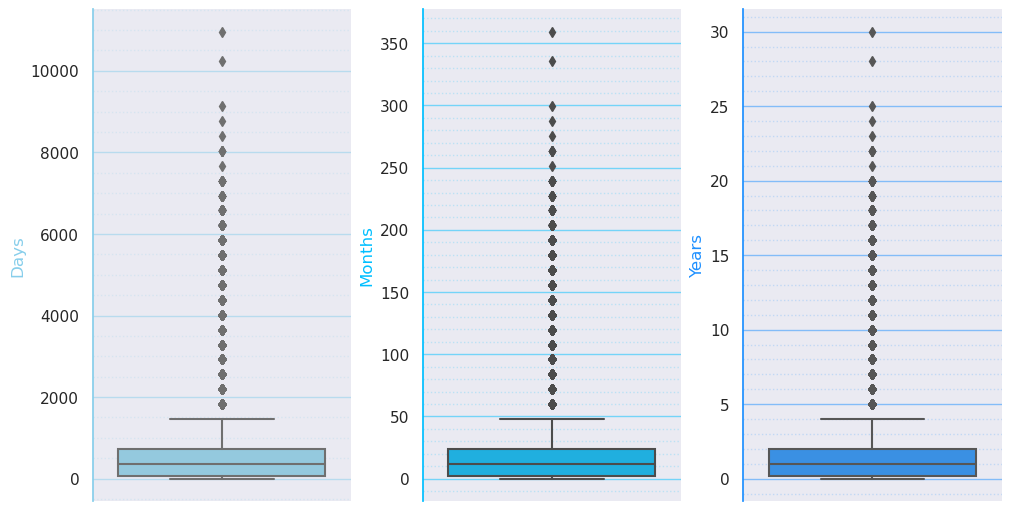

In [1327]:
aui_stats(aui_days, aui_months, aui_years)

As we can see, we have a lot of outliers. Lets remove them using interquartile range, to see better how data are distributed along the data normal range without outliers.

In [1328]:
def remove_outliers(data: pd.Series) -> pd.Series:
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{data.name}: lower bound = {lower_bound}, upper bound = {upper_bound}")
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [1329]:
aui_days_filtered = remove_outliers(data=aui_days)
aui_months_filtered = remove_outliers(data=aui_months)
aui_years_filtered = remove_outliers(data=aui_years)

Age upon Intake: lower bound = -945.0, upper bound = 1735.0
Age upon Intake: lower bound = -30.983606557377048, upper bound = 56.885245901639344
Age upon Intake: lower bound = -2.587268993839836, upper bound = 4.7501711156741955


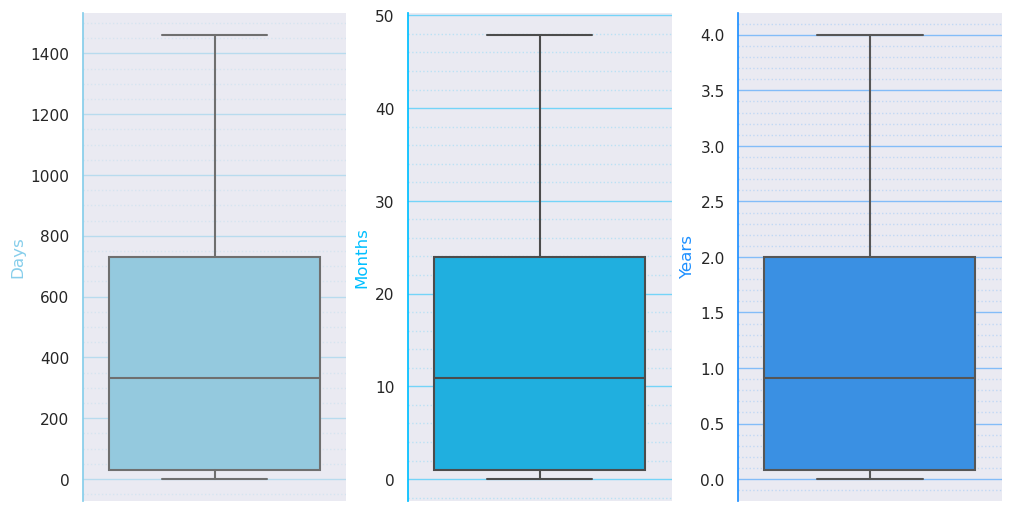

In [1330]:
aui_stats(aui_days_filtered, aui_months_filtered, aui_years_filtered)

This descriptive statistics tells us where is the median, outliers, quartiles, which is very useful for data analysis. We already used information about outliers and removed them. 

### Intake DateTime Description

In this description we will try histogram to see distribution of intakes along all the years, where each bin will be each month of the year - it will show us how many intakes were in each month.

In [1331]:
indt_column = df_in_cleaned["Intake DateTime"]
indt_column.info()

<class 'pandas.core.series.Series'>
RangeIndex: 138585 entries, 0 to 138584
Series name: Intake DateTime
Non-Null Count   Dtype         
--------------   -----         
138585 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 MB


In [1332]:
first_intake_date = indt_column.min()
last_intake_date = indt_column.max()
diff = last_intake_date - first_intake_date
months_count = int(diff.days / 30.5)
print(
    f"First year: {first_intake_date}; Last year: {last_intake_date}; Months between: {months_count}"
)

First year: 2013-10-01 07:51:00; Last year: 2022-04-27 07:54:00; Months between: 102


<AxesSubplot:xlabel='Intake Date', ylabel='Intakes Count'>

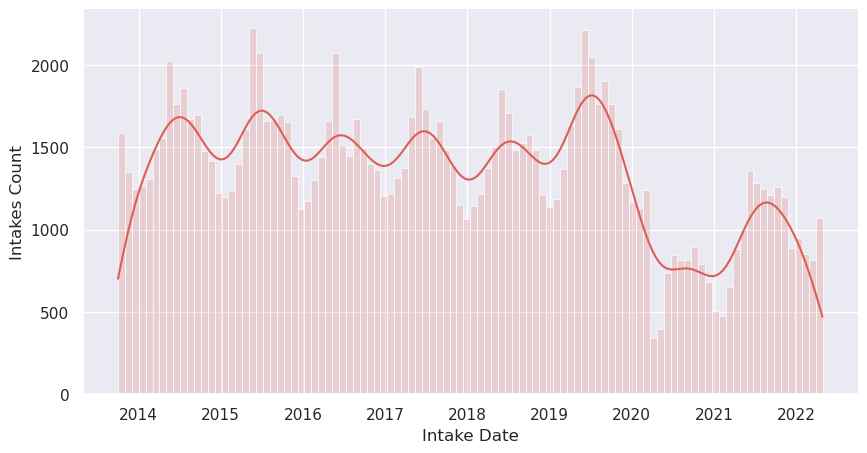

In [1333]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xlabel("Intake Date")
ax.set_ylabel("Intakes Count")

ax.minorticks_on()
sns.histplot(data=indt_column, bins=months_count, alpha=0.2, kde=True, stat="count")

We can se now how number of intakes per month are distributed. The **kde** option computes density estimate of the histogram to give as a smooth approximation

### Intakes Name

Lets explore name counts across the Name column in intake dataset

In [1334]:
names = df_in_cleaned["Name"]
names.describe()

count     95663
unique    17716
top         Max
freq        683
Name: Name, dtype: object

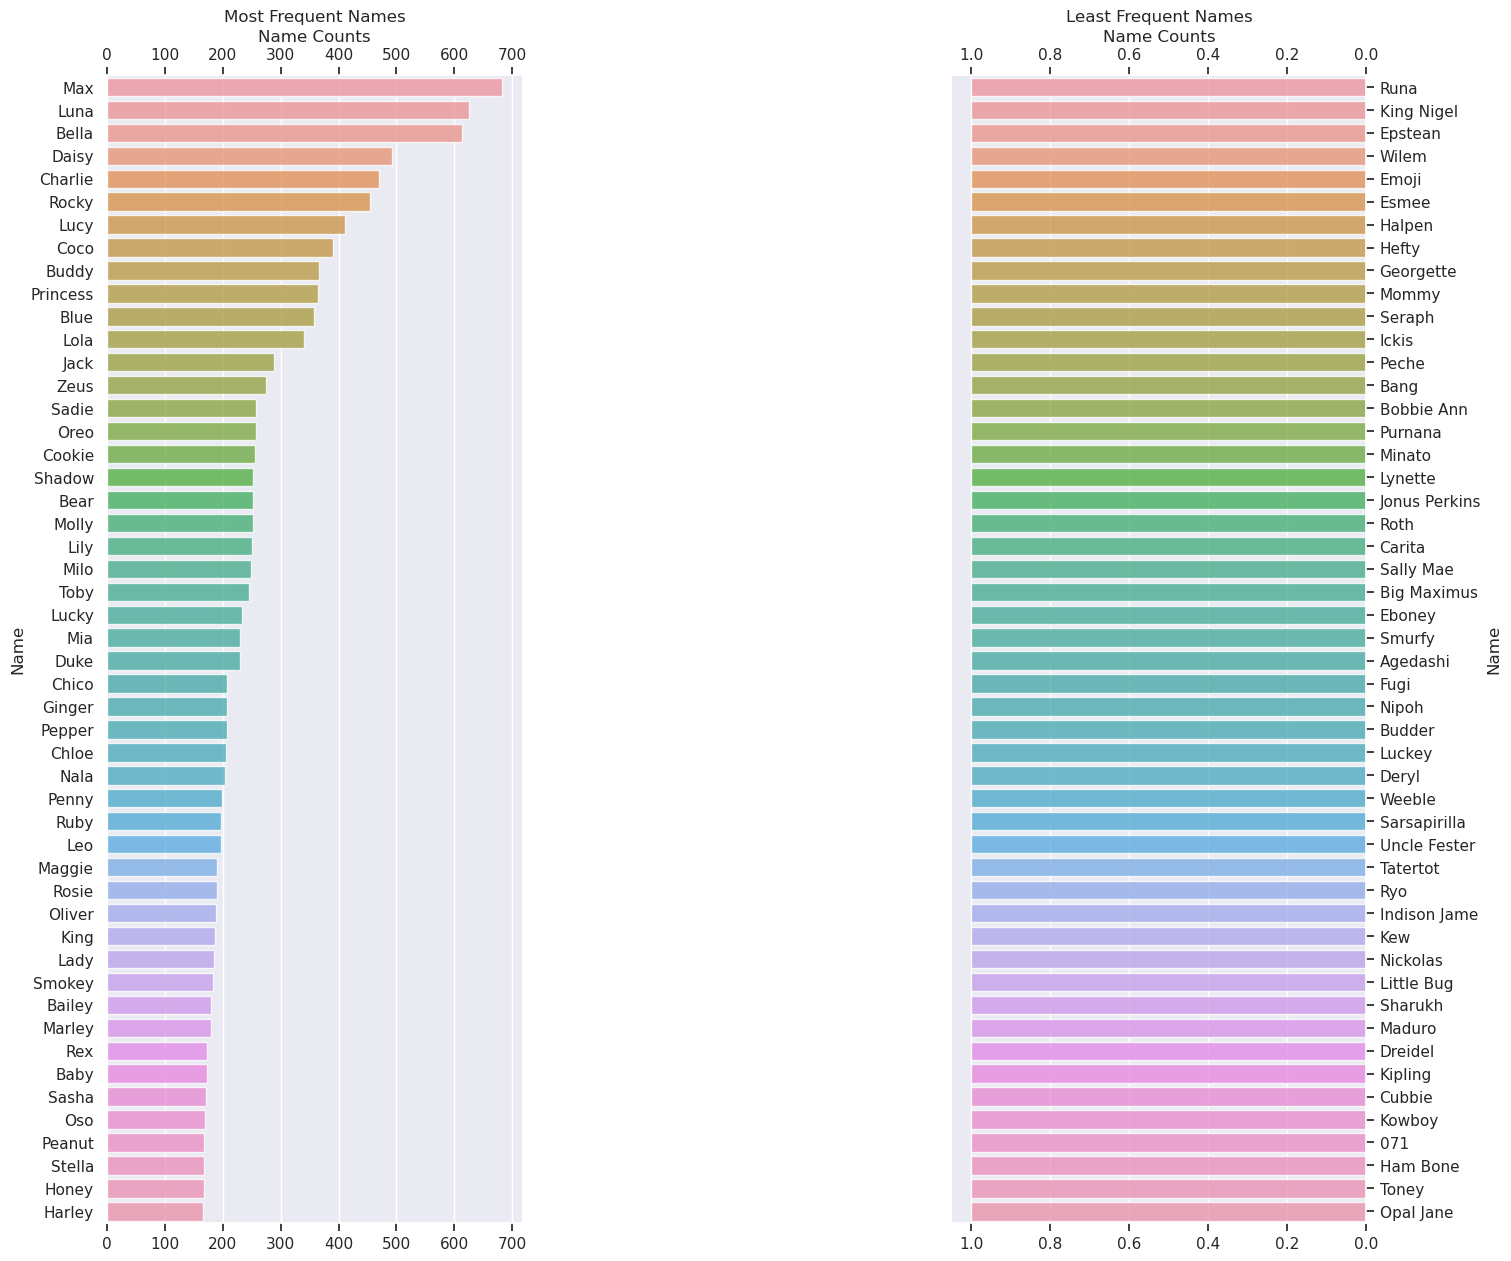

In [1335]:
def names_frequency(data: pd.Series, limit: int = 10) -> None:
    counts_data = (
        data.value_counts()
    )  # count how many times the name occurs for each name

    fig = plt.figure(
        figsize=(min(15, 0.4 * limit), 0.25 * limit), constrained_layout=True
    )

    # most frequent
    most_freq = counts_data.iloc[0:limit]
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.spines["right"].set_visible(False)

    ax1.set_xlabel("Name Counts")
    ax1.set_ylabel("Name")
    ax1.set_title("Most Frequent Names")
    ax1.xaxis.set_label_position("top")
    ax1.xaxis.set_tick_params(bottom=True, top=True, labeltop=True, labelbottom=True)
    sns.barplot(ax=ax1, x=most_freq.values, y=most_freq.index, orient="h", alpha=0.8)

    # least frequent
    least_freq = counts_data.iloc[-(limit + 1) : -1]
    ax2 = fig.add_subplot(1, 3, 3)
    ax2.spines["left"].set_visible(False)
    ax2.set_xlabel("Name Counts")
    ax2.set_ylabel("Name")
    ax2.set_title("Least Frequent Names")
    ax2.xaxis.set_label_position("top")
    ax2.xaxis.set_tick_params(bottom=True, top=True, labeltop=True, labelbottom=True)
    ax2.invert_xaxis()
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.set_tick_params(right=True, left=False, labelright=True, labelleft=False)
    sns.barplot(ax=ax2, x=least_freq.values, y=least_freq.index, orient="h", alpha=0.8)


names_frequency(names, limit=50)

### Intakes Animal Type

In [1336]:
at_column = df_in_cleaned["Animal Type"]
at_values_cnt = at_column.value_counts()

[Text(0, 0, '78145'),
 Text(0, 0, '52380'),
 Text(0, 0, '7375'),
 Text(0, 0, '661'),
 Text(0, 0, '24')]

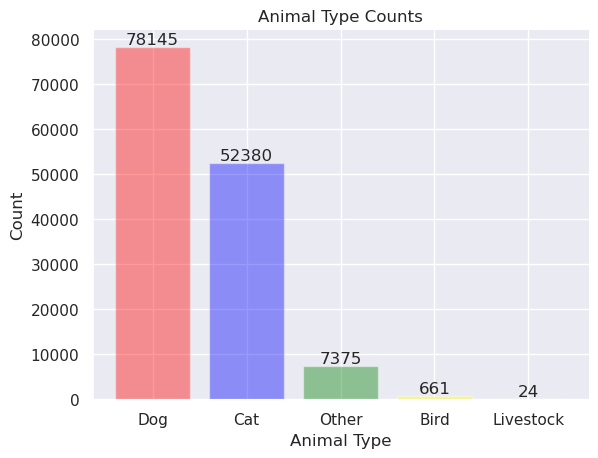

In [1337]:
fig, ax = plt.subplots()
ax.set_title("Animal Type Counts")
ax.set_xlabel("Animal Type")
ax.set_ylabel("Count")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
barplot = ax.bar(
    x=at_values_cnt.index,
    height=at_values_cnt.values,
    color=["red", "blue", "green", "yellow", "purple"],
    alpha=0.4,
)
ax.bar_label(barplot, at_values_cnt.values)

### Intake Type

In [1338]:
df_in_cleaned["Intake Type"].info()
it_counts = df_in_cleaned["Intake Type"].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 138585 entries, 0 to 138584
Series name: Intake Type
Non-Null Count   Dtype   
--------------   -----   
138585 non-null  category
dtypes: category(1)
memory usage: 135.7 KB


In [1339]:
lables = it_counts.index
values = it_counts.values
total_counts = values.sum()


def label_pct(count, total_cnt) -> float:
    return 100 * count / total_counts


labels_pcts = {label: label_pct(it_counts[label], total_counts) for label in lables}

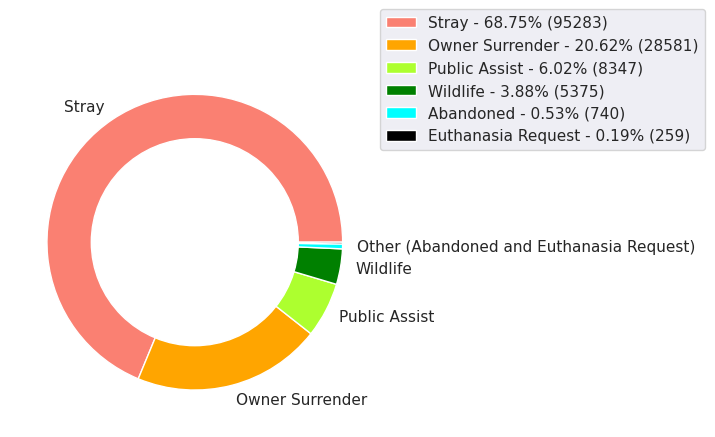

In [1340]:
fig, ax = plt.subplots()

labels_to_show = [
    "Stray",
    "Owner Surrender",
    "Public Assist",
    "Wildlife",
    "Other (Abandoned and Euthanasia Request)",
    None,
]
ax.pie(
    x=values,
    labels=labels_to_show,
    colors=["salmon", "orange", "greenyellow", "green", "cyan", "black"],
)


# legend with stats that can be seen
legend_labels = [
    f"{label} - {labels_pcts[label]:.2f}% ({it_counts[label]})" for label in lables
]
ax.legend(legend_labels, loc=(1, 0.75))

# create white circle for the donought plot
circle = patches.Circle(xy=(0, 0), radius=0.7, color="white")
ax.add_patch(circle)

## 2.2 Bivariate

### Correlation between Intake Type and Animal Type 

We need to describe dependency between category to category relation

In [1341]:
it_column = df_in_cleaned["Intake Type"]
at_column = df_in_cleaned["Animal Type"]

Let's create frequency table which will show us how many rows there are for each combination of category from two columns

In [1342]:
frequency_table = pd.crosstab(it_column, at_column)
frequency_table

Animal Type,Bird,Cat,Dog,Livestock,Other
Intake Type,,,,,
Abandoned,0,366,347,0,27
Euthanasia Request,3,59,183,0,14
Owner Surrender,83,10590,17144,1,763
Public Assist,137,1157,6738,1,314
Stray,328,40208,53732,22,993
Wildlife,110,0,1,0,5264


<AxesSubplot:xlabel='Animal Type', ylabel='Intake Type'>

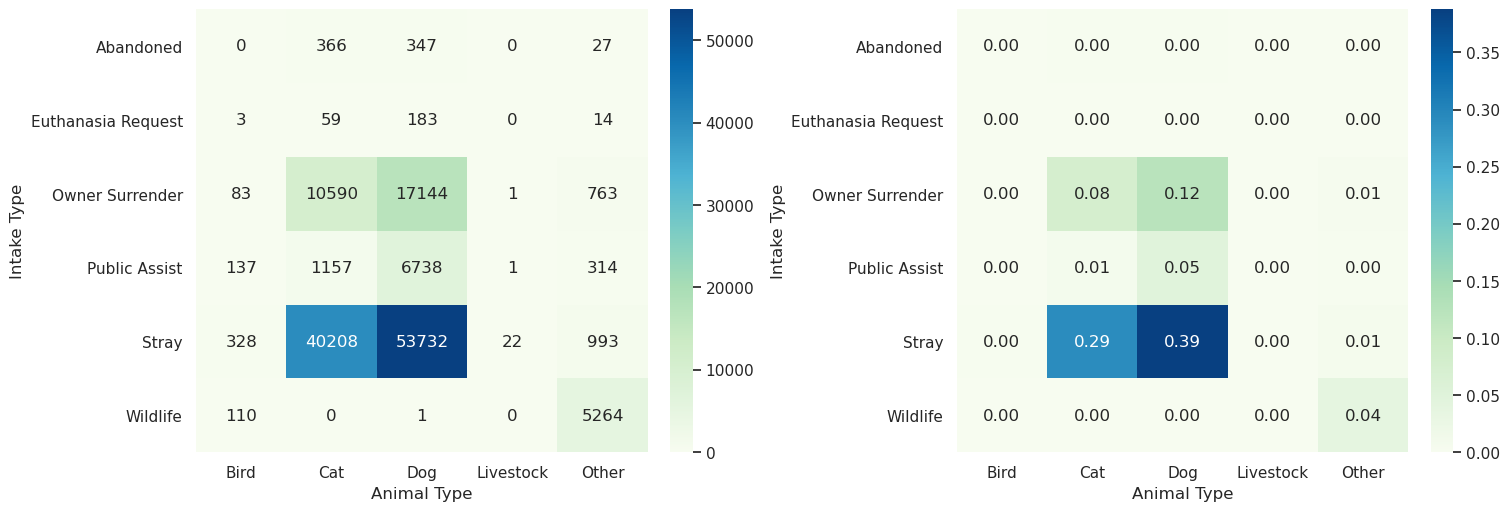

In [1343]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, figsize=(15, 5), constrained_layout=True
)
sns.heatmap(frequency_table, ax=ax1, annot=True, fmt="g", cmap="GnBu")
sns.heatmap(
    frequency_table.div(len(it_column)), annot=True, ax=ax2, fmt=".2f", cmap="GnBu"
)

We can see that the highest dependency is between Stray-Dog and Stray-Cat categories, those pairs are dependent on each other. So if the animal type is Stray, then most likely it is a cat or dog.

### Age upon Intake and Intake Animal Type

We need to describe numeric to category relation

Age upon Intake has some outliers, let's get rid of them, using some previous work, where we described Age upon Intake  with univariate statistics

In [1344]:
df_in_no_aui_outliers = df_in_cleaned.loc[aui_days_filtered.index]
df_aui_at = df_in_no_aui_outliers[["Age upon Intake", "Animal Type"]]
df_aui_at.head(5)

,Age upon Intake,Animal Type
0,730 days,Dog
2,334 days,Dog
3,28 days,Cat
4,1461 days,Dog
5,730 days,Dog


In [1345]:
df_aui_at.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118353 entries, 0 to 138584
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   Age upon Intake  118353 non-null  timedelta64[ns]
 1   Animal Type      118353 non-null  category       
dtypes: category(1), timedelta64[ns](1)
memory usage: 1.9 MB


In [1346]:
categorical = df_aui_at["Animal Type"]
continuous_days = df_aui_at["Age upon Intake"].dt.days
continuous_months = continuous_days / 30.5
continuous_years = continuous_days / 365.25

[Text(0, 0.5, 'Age upon Intake (Years)')]

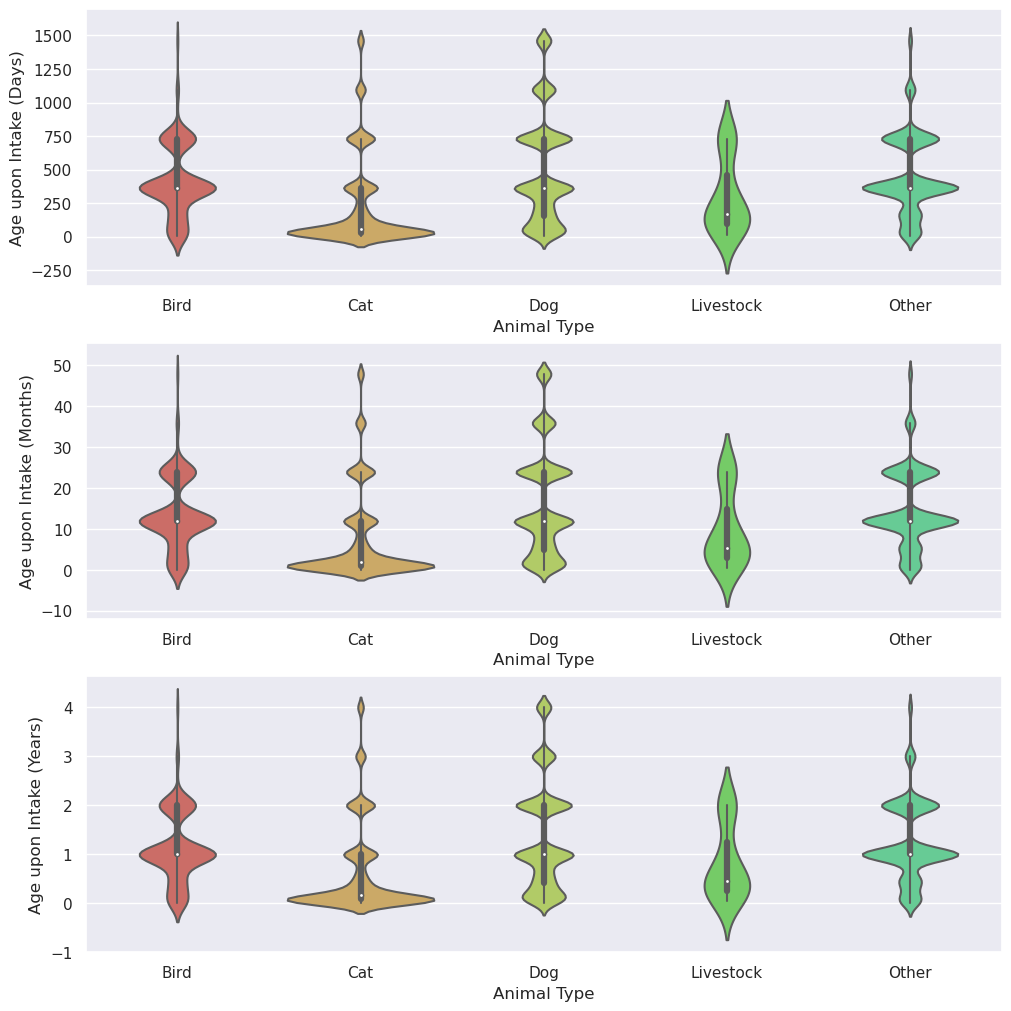

In [1347]:
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=3, ncols=1, figsize=(10, 10), constrained_layout=True
)
sns.violinplot(data=df_aui_at, x=categorical, y=continuous_days, ax=ax1).set(
    ylabel="Age upon Intake (Days)"
)
sns.violinplot(data=df_aui_at, x=categorical, y=continuous_months, ax=ax2).set(
    ylabel="Age upon Intake (Months)"
)
sns.violinplot(data=df_aui_at, x=categorical, y=continuous_years, ax=ax3).set(
    ylabel="Age upon Intake (Years)"
)

From these plots we can see where is the median, interquartile range and quartiles

Let's also draw some histogram, which will describe better counts

In [1348]:
grouped = df_aui_at.groupby('Animal Type')

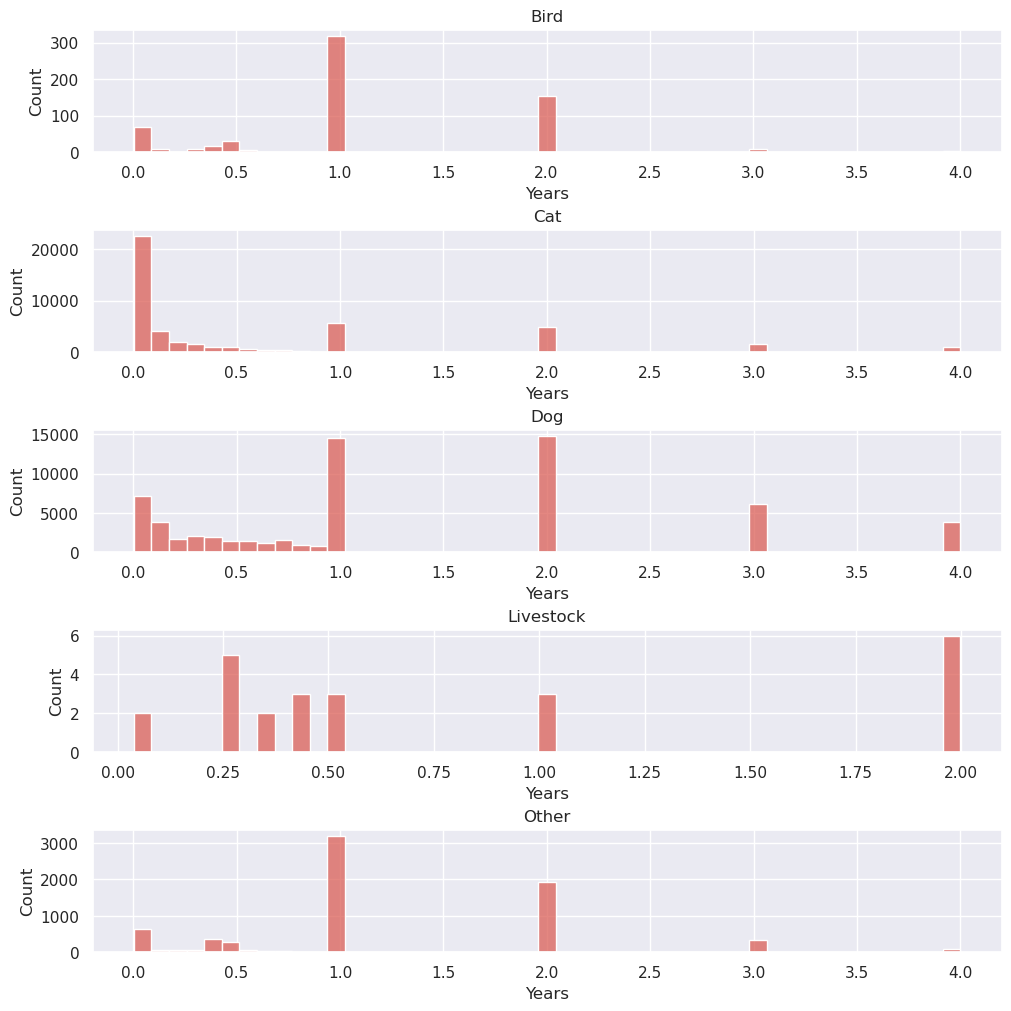

In [1349]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 10), constrained_layout=True)

index = 0
for name, group in grouped:
    ax = axes[index]
    sns.histplot(
        x=group["Age upon Intake"].dt.days / 365.25,
        bins=int(aui_months_filtered.max()),
        palette=palette[index],
        ax=ax,
    ).set(title=name, xlabel="Years")
    index += 1

[Text(0.5, 1.0, 'Stacked histogram')]

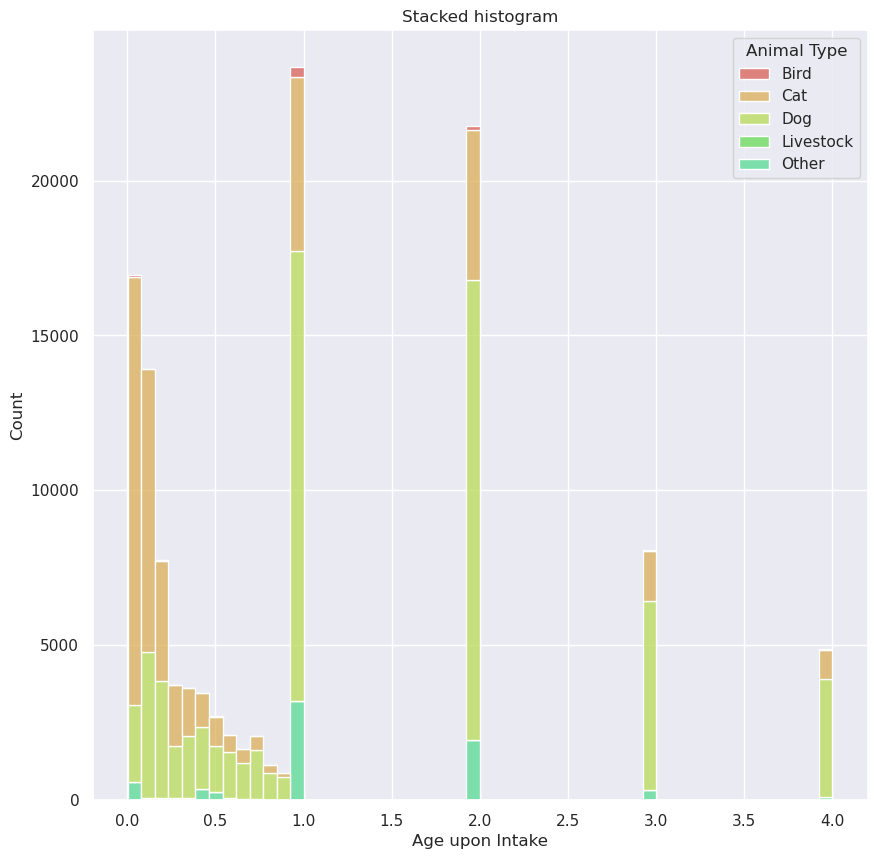

In [1350]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(
        data=df_aui_at, x=continuous_years, hue=categorical, multiple='stack',
        palette=palette[:categorical.nunique()], ax=ax
    ).set(title='Stacked histogram')

# 3. Required Questions

### 1. Does the Outcome Type Depends on Intake Type?

In [1351]:
df_aid_ot = df_out_cleaned[["Animal ID", "Outcome Type"]].dropna()
df_aid_it = df_in_cleaned[["Animal ID", "Intake Type"]].dropna()

In [1352]:
df_it_ot = df_aid_it.merge(df_aid_ot, how="inner", on="Animal ID")
df_it_ot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178800 entries, 0 to 178799
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Animal ID     178800 non-null  int64   
 1   Intake Type   178800 non-null  category
 2   Outcome Type  178800 non-null  category
dtypes: category(2), int64(1)
memory usage: 3.1 MB


We can see, that we have much more rows than expected. This is because of duplicated rows, which with inner join will produce cartesian cross between all same duplicated rows from another dataset.

In [1353]:
df_aid_it[df_aid_it.duplicated()].head()

,Animal ID,Intake Type
1505,732478,Public Assist
2614,801583,Owner Surrender
2653,730944,Stray
3481,830075,Stray
4034,716018,Stray


In [1354]:
df_aid_it[df_aid_it["Animal ID"] == 732478]

,Animal ID,Intake Type
748,732478,Public Assist
1505,732478,Public Assist
28009,732478,Public Assist


Let's for simplicity drop duplicated rows

In [1355]:
df_aid_it = df_aid_it.drop_duplicates()
df_aid_ot = df_aid_ot.drop_duplicates()

In [1356]:
df_it_ot = df_aid_it.merge(df_aid_ot, how="inner", on="Animal ID")
df_it_ot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138161 entries, 0 to 138160
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Animal ID     138161 non-null  int64   
 1   Intake Type   138161 non-null  category
 2   Outcome Type  138161 non-null  category
dtypes: category(2), int64(1)
memory usage: 2.4 MB


We have category to category statistics, let's use for it the heatmap

In [1357]:
frequency_table = pd.crosstab(df_it_ot["Intake Type"], df_it_ot["Outcome Type"])
frequency_table

Outcome Type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer
Intake Type,,,,,,,,,
Abandoned,418,4,4,6,0,0,71,12,233
Euthanasia Request,18,3,2,202,0,0,15,0,35
Owner Surrender,17380,183,14,815,14,0,2157,326,7890
Public Assist,1698,52,59,467,3,0,5099,109,1333
Stray,42857,926,137,3091,60,10,14680,597,31816
Wildlife,7,142,413,4721,2,14,3,0,63


<AxesSubplot:xlabel='Outcome Type', ylabel='Intake Type'>

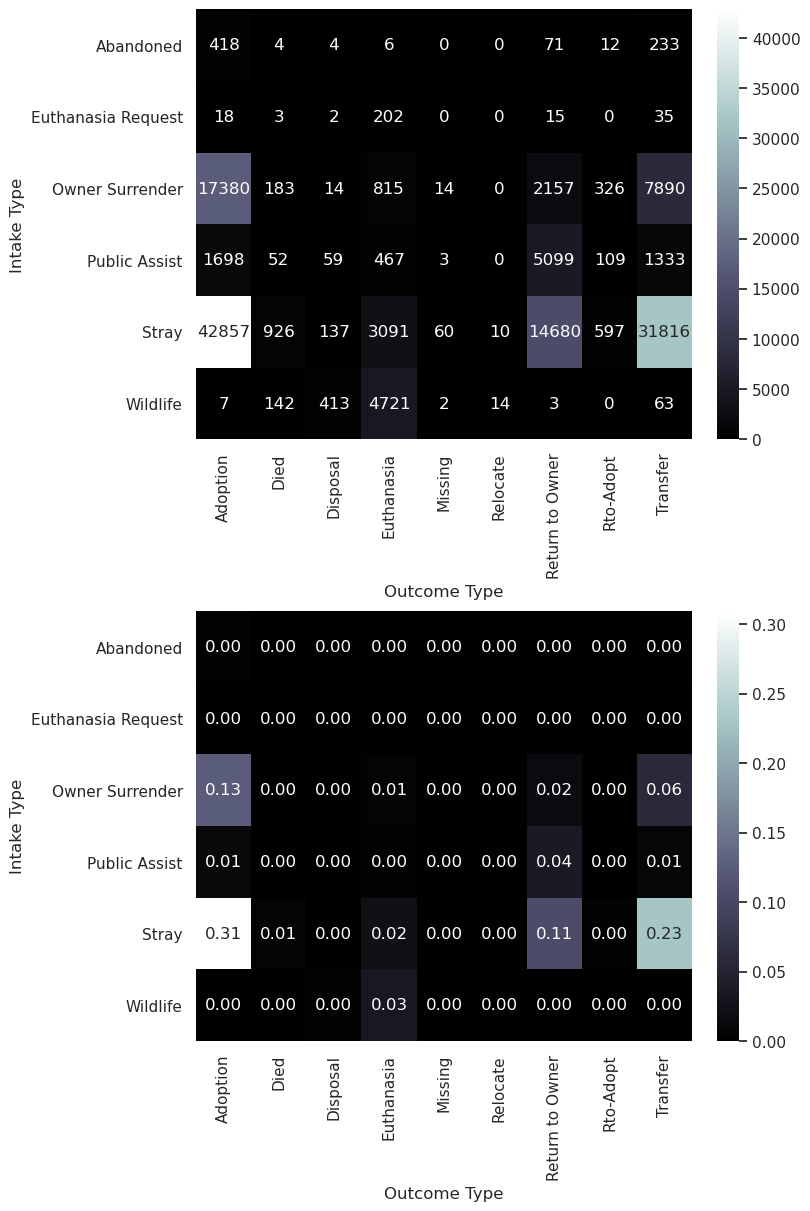

In [1358]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(8, 12), constrained_layout=True
)
sns.heatmap(frequency_table, ax=ax1, annot=True, fmt="g", cmap="bone")
sns.heatmap(frequency_table.div(len(it_column)), annot=True, ax=ax2, fmt=".2f", cmap='bone')

We can see, that some category pairs correlate strongly:

- Stray-Adoption has the highest value. Almost half of the Stray animals are adopted, while the other hals transfered or returned to the owner (if animal is stray and doesn't have any label with its name or address)

Also we can see that more than half of the Animals that have Owner Surrender intake type are adopted and the rest are transfered somewhere else.

So for some categories pairs there is strong correlation, while for most of them there is no correlation.

### 2. Does the Age upon Outcome play some role with adoption?

Outcome Type category we have Rto-Adopt and Adoption values, Rto-Adopt is not quite clear what it means, so we will use only Adoption value

In [1359]:
df_adopted = df_out_cleaned[df_out_cleaned['Outcome Type'].isin(['Adoption'])]
df_auo_ot = df_adopted[['Age upon Outcome','Outcome Type']]
df_auo_ot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63518 entries, 1 to 138765
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Age upon Outcome  63511 non-null  timedelta64[ns]
 1   Outcome Type      63518 non-null  category       
dtypes: category(1), timedelta64[ns](1)
memory usage: 1.0 MB


In [1360]:
# drop null rows from Age upon Outcome column
df_auo_ot = df_auo_ot.dropna(axis=0)

In [1361]:
df_auo_ot['Days'] = df_auo_ot['Age upon Outcome'].dt.days
df_auo_ot['Years'] = df_auo_ot['Days']/365.25
df_auo_ot.head()


,Age upon Outcome,Outcome Type,Days,Years
1,365 days,Adoption,365,0.999316
3,121 days,Adoption,121,0.331280
5,2556 days,Adoption,2556,6.997947
6,730 days,Adoption,730,1.998631
7,60 days,Adoption,60,0.164271


<AxesSubplot:ylabel='Years'>

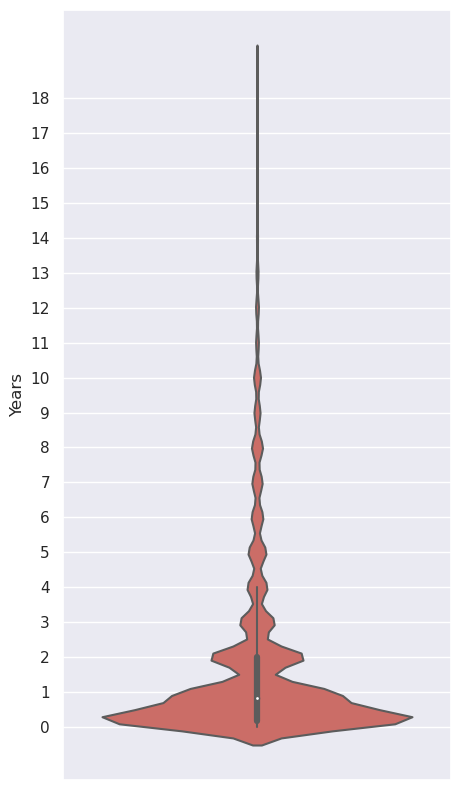

In [1362]:
fig, ax = plt.subplots(figsize=(5, 10))
ax.set_yticks(list(range(0, math.ceil((df_auo_ot["Years"].max())))))
sns.violinplot(data=df_auo_ot, y="Years", ax=ax)


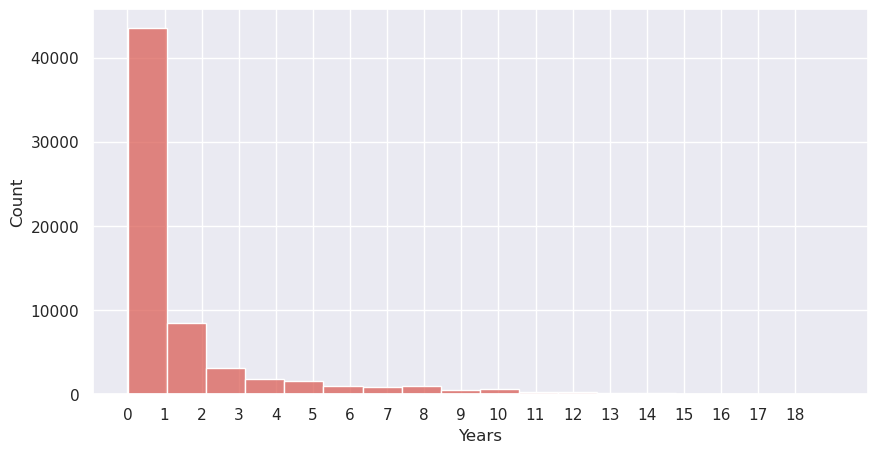

In [1363]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df_auo_ot, x="Years", bins=int(df_auo_ot['Years'].max()), ax=ax)
ax.set_xticks(list(range(0, math.ceil((df_auo_ot["Years"].max())))))


We can see, that people mostly adopt animals with low age - mainly not older that 2.5 years.

From the violin plot we can se that more than 50% of adopted animals have age less then 1 year.

So, yes, age plays very important role in adoption.

### 3. Is the animal intake during the year constant or there are some periods with high or low intake load?

In [1364]:
df_idt = pd.DataFrame(df_in_cleaned["Intake DateTime"])
df_idt["Month"] = df_idt["Intake DateTime"].dt.month_name()
df_idt.head()

,Intake DateTime,Month
0,2019-01-03 16:19:00,January
1,2015-07-05 12:59:00,July
2,2016-04-14 18:43:00,April
3,2013-10-21 07:59:00,October
4,2014-06-29 10:38:00,June


Month names are not ordered, let's covnert it to categorical data type with specified order

In [1365]:
cat_month_names = CategoricalDtype(
    categories=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
    ordered=True,
)
df_idt["Month"] = df_idt["Month"].astype(cat_month_names)

<AxesSubplot:xlabel='Month', ylabel='Count'>

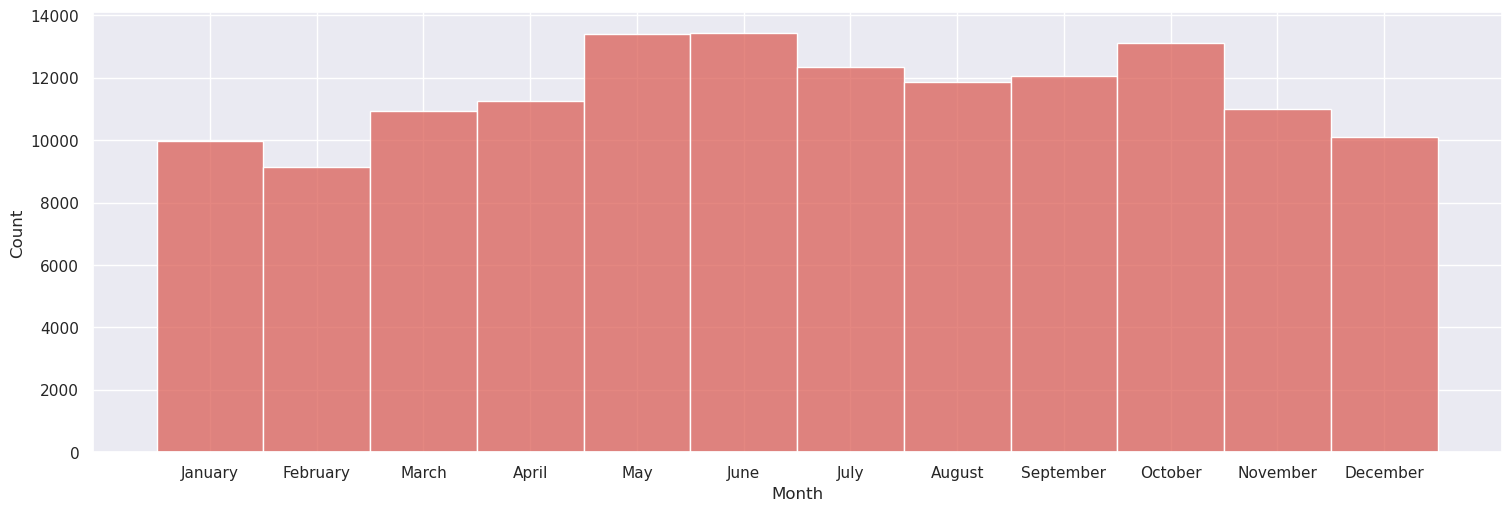

In [1366]:
fig, ax = plt.subplots(figsize=(15, 5), constrained_layout=True)
sns.histplot(data=df_idt, x="Month", ax=ax)

As we can see, in winter there are less intakes, while in transition between spring and summer there are more intakes.

So the intake load is not constant, though the change bettween season is not so big.

# 4. Own Questions

### 1. Does the Animal Type depends on Location in intake number?

In [1367]:
df_in_cleaned['Found Location'].describe()

count          138585
unique          58367
top       Austin (TX)
freq            26051
Name: Found Location, dtype: object

There are 58367 unique places, so let's take first 10 places

In [1368]:
fl_counts = df_in_cleaned['Found Location'].value_counts()
fl_counts.head(10)

Austin (TX)                           26051
Travis (TX)                            2516
Outside Jurisdiction                   1714
7201 Levander Loop in Austin (TX)      1029
Manor (TX)                              736
Pflugerville (TX)                       668
Del Valle (TX)                          527
4434 Frontier Trail in Austin (TX)      329
124 W Anderson Ln in Austin (TX)        236
4434 Frontier Trl in Austin (TX)        213
Name: Found Location, dtype: int64

In [1369]:
top_ten_locations = fl_counts.head(10).index
top_ten_locations


Index(['Austin (TX)', 'Travis (TX)', 'Outside Jurisdiction',
       '7201 Levander Loop in Austin (TX)', 'Manor (TX)', 'Pflugerville (TX)',
       'Del Valle (TX)', '4434 Frontier Trail in Austin (TX)',
       '124 W Anderson Ln in Austin (TX)', '4434 Frontier Trl in Austin (TX)'],
      dtype='object')

In [1370]:
# filter rows to match chosen locations
df_fl_at = df_in_cleaned[['Found Location','Animal Type']]
df_fl_at = df_fl_at[df_fl_at['Found Location'].isin(top_ten_locations)]
df_fl_at.describe()

,Found Location,Animal Type
count,34019,34019
unique,10,5
top,Austin (TX),Dog
freq,26051,20739


In [1371]:
frequency_table = pd.crosstab(df_fl_at['Found Location'], df_fl_at['Animal Type'])
frequency_table

Animal Type,Bird,Cat,Dog,Livestock,Other
Found Location,,,,,
124 W Anderson Ln in Austin (TX),0,146,87,0,3
4434 Frontier Trail in Austin (TX),0,169,157,0,3
4434 Frontier Trl in Austin (TX),2,81,129,0,1
7201 Levander Loop in Austin (TX),21,440,545,0,23
Austin (TX),80,9440,15571,2,958
Del Valle (TX),1,169,351,0,6
Manor (TX),1,221,497,0,17
Outside Jurisdiction,1,387,1292,0,34
Pflugerville (TX),0,232,425,0,11


<AxesSubplot:xlabel='Animal Type', ylabel='Found Location'>

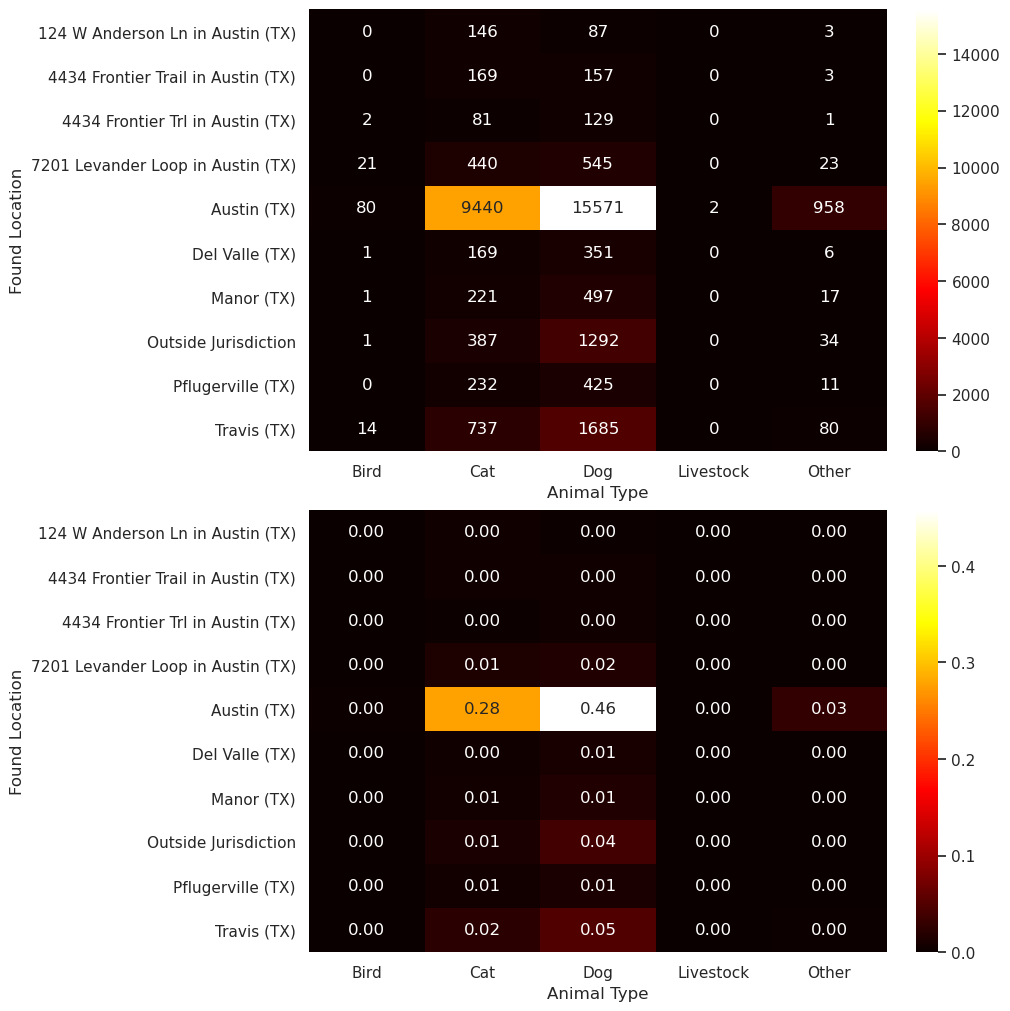

In [1372]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10), constrained_layout = True)
sns.heatmap(frequency_table, annot=True, fmt='g', ax=ax1, cmap='hot')
sns.heatmap(frequency_table.div(len(df_fl_at)), annot=True, fmt='.2f', ax=ax2, cmap='hot')

This question is quite hard to answer, because locations are not categorical data, many of records may represent same location, and there are too many records.

But still we can see, where also animals can be found, which can help to go into deeper analysis.

From this plot, which is very inaccurate, we can see, that Dogs can be found mainly in Austin, but also in other places like Travis, Pflugerville, Manor and Del Valle.

### 2. How Age Upon Intake, Age upon Outcome depend on each other across all Animal Types?

In [1373]:
df_aid_aui_at = df_in_cleaned[['Animal ID','Age upon Intake','Animal Type']].drop_duplicates()
df_aid_auo_at = df_out_cleaned[['Animal ID','Age upon Outcome','Animal Type']].drop_duplicates()
df_aui_auo_at = df_aid_aui_at.merge(df_aid_auo_at, how='inner',on='Animal ID')
df_aui_auo_at.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144971 entries, 0 to 144970
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   Animal ID         144971 non-null  int64          
 1   Age upon Intake   144049 non-null  timedelta64[ns]
 2   Animal Type_x     144971 non-null  category       
 3   Age upon Outcome  144740 non-null  timedelta64[ns]
 4   Animal Type_y     144971 non-null  category       
dtypes: category(2), int64(1), timedelta64[ns](2)
memory usage: 4.7 MB


After merge we have duplicated Animal Type_x and Animal Type_y columns. Let's check if they are really identical.

In [1374]:
df_aui_auo_at[df_aui_auo_at['Animal Type_x'] != df_aui_auo_at['Animal Type_y']]

,Animal ID,Age upon Intake,Animal Type_x,Age upon Outcome,Animal Type_y


In [1375]:
df_aui_auo_at.drop(columns=['Animal Type_y'], inplace=True)
df_aui_auo_at.rename(columns={'Animal Type_x':'Animal Type'}, inplace=True)
df_aui_auo_at.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144971 entries, 0 to 144970
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   Animal ID         144971 non-null  int64          
 1   Age upon Intake   144049 non-null  timedelta64[ns]
 2   Animal Type       144971 non-null  category       
 3   Age upon Outcome  144740 non-null  timedelta64[ns]
dtypes: category(1), int64(1), timedelta64[ns](2)
memory usage: 4.6 MB


In [1376]:
df_aui_auo_at['AUI years'] = df_aui_auo_at['Age upon Intake'].dt.days/365.25
df_aui_auo_at['AUO years'] = df_aui_auo_at['Age upon Outcome'].dt.days/365.25
df_aui_auo_at.head()

,Animal ID,Age upon Intake,Animal Type,Age upon Outcome,AUI years,AUO years
0,786884,730 days,Dog,730 days,1.998631,1.998631
1,706918,2922 days,Dog,2922 days,8.000000,8.000000
2,724273,334 days,Dog,365 days,0.914442,0.999316
3,665644,28 days,Cat,28 days,0.076660,0.076660
4,682524,1461 days,Dog,1461 days,4.000000,4.000000


<AxesSubplot:xlabel='AUI years', ylabel='AUO years'>

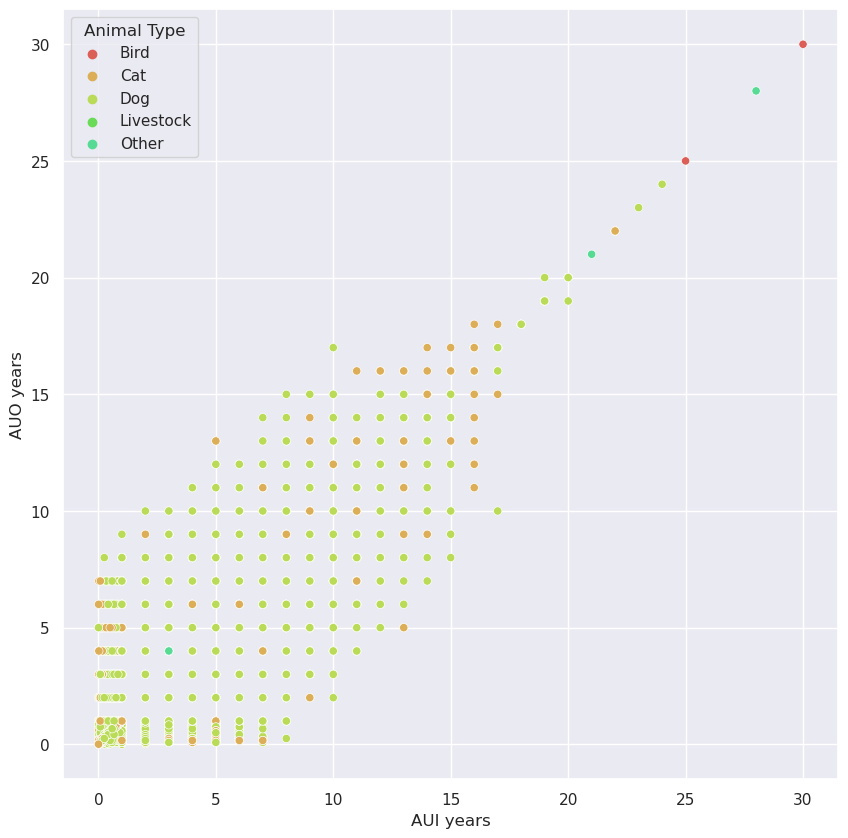

In [1377]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=df_aui_auo_at, x='AUI years', y='AUO years', hue='Animal Type', ax=ax)

There are some points, where AUI years and AUO years correlate highly, but with higher age upon intake/outcome we have less data, so we cannot rely on such points, if the high correlation they represent is real.

If we look at what happens, when years are less than 15, we can see that there is very low correlation across cats and dogs. Across Other types we cannot judge, because there is not enough data points.

Let's  look what happens if we consider only ages less than 10 years

In [1378]:
df_aui_auo_at_sub = df_aui_auo_at[(df_aui_auo_at['AUI years'] < 10) & (df_aui_auo_at['AUO years'] < 10)]

<AxesSubplot:xlabel='AUI years', ylabel='AUO years'>

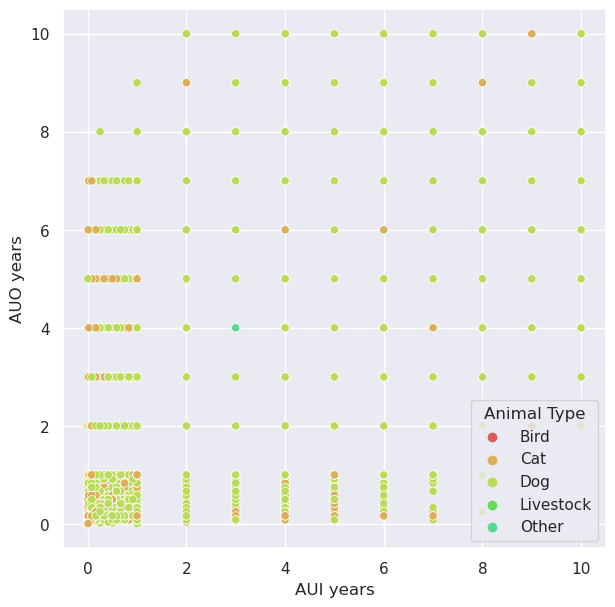

In [1379]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=df_aui_auo_at_sub, x='AUI years', y='AUO years', hue='Animal Type', ax=ax)

Again, correlation is very low. Let's go even further and consider years less than 2

<AxesSubplot:xlabel='AUI years', ylabel='AUO years'>

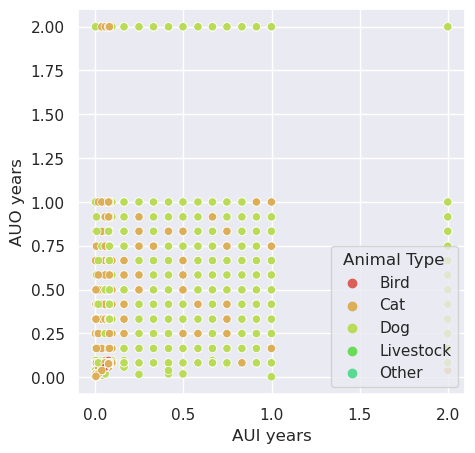

In [1380]:
df_aui_auo_at_sub = df_aui_auo_at[(df_aui_auo_at['AUI years'] < 2) & (df_aui_auo_at['AUO years'] < 2)]
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=df_aui_auo_at_sub, x='AUI years', y='AUO years', hue='Animal Type', ax=ax)

Results are the same, no visible distinctive correlation even for small ages

### 3. How the Intakes Number correlates with Outcomes Number in each month along every year

In [1381]:
df_intakes_per_month = pd.DataFrame(df_in_cleaned['Intake DateTime'].dropna().dt.month_name().value_counts())
df_intakes_per_month

,Intake DateTime
June,13424
May,13397
October,13112
July,12331
September,12049
August,11861
April,11253
November,10996
March,10946
December,10105


In [1382]:
df_outcomes_per_month = pd.DataFrame(df_out_cleaned['Outcome DateTime'].dropna().dt.month_name().value_counts())
df_outcomes_per_month

,Outcome DateTime
July,13160
October,13053
June,12756
August,12624
September,11757
December,11737
November,11482
May,11377
March,10776
January,10605


In [1383]:
df_joined = (
    df_intakes_per_month.join(df_outcomes_per_month)
    .reset_index()
    .rename(columns={"index": "Month"})
)
df_joined['Month'] = df_joined['Month'].astype(cat_month_names)
df_joined = df_joined.sort_values(by='Month').reset_index(drop=True)
df_joined

,Month,Intake DateTime,Outcome DateTime
0,January,9974,10605
1,February,9137,9303
2,March,10946,10776
3,April,11253,10139
4,May,13397,11377
5,June,13424,12756
6,July,12331,13160
7,August,11861,12624
8,September,12049,11757
9,October,13112,13053


<AxesSubplot:xlabel='Month', ylabel='Intake DateTime'>

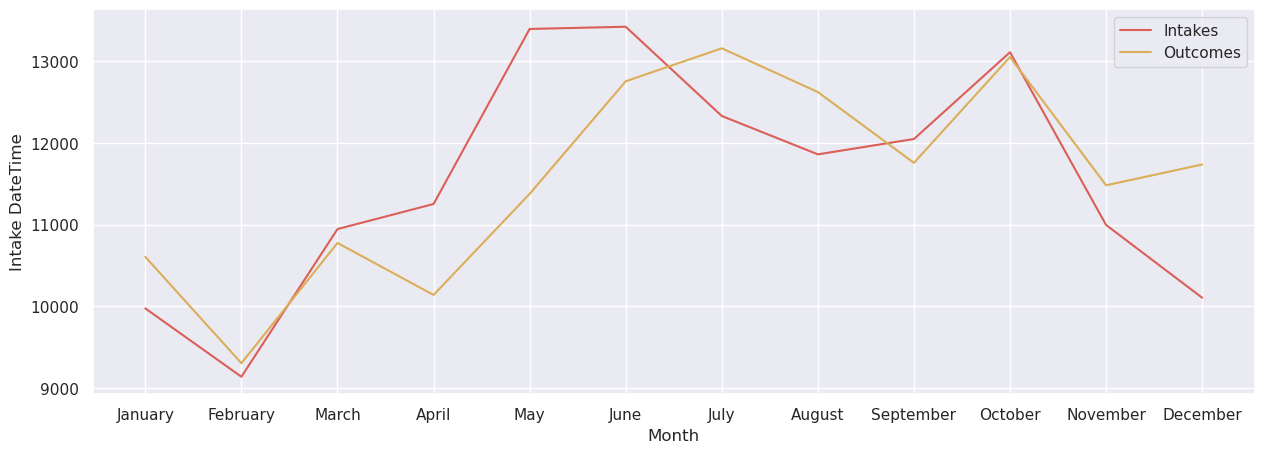

In [1384]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=df_joined, x="Month", y="Intake DateTime", label="Intakes", ax=ax)
sns.lineplot(data=df_joined, x="Month", y="Outcome DateTime", label="Outcomes", ax=ax)

As we can see, there is some correlation between intakes and outcomes number for each month across all years

### 4. Does the Intake Condition or Intake Type depend on missing names?

In [1394]:
df_name_ic_it = df_in_cleaned[['Name','Intake Condition', 'Intake Type']].copy()
df_name_ic_it['Missing Name'] = df_name_ic_it['Name'].isna()
df_name_ic_it.head()

,Name,Intake Condition,Intake Type,Missing Name
0,Brock,Normal,Stray,False
1,Belle,Normal,Stray,False
2,Runster,Normal,Stray,False
3,NaN,Sick,Stray,True
4,Rio,Normal,Stray,False


In [1395]:
freq_table_ic =pd.crosstab(df_name_ic_it['Missing Name'], df_name_ic_it['Intake Condition'])
freq_table_ic

Intake Condition,Aged,Behavior,Feral,Injured,Med Attn,Med Urgent,Medical,Neonatal,Normal,Nursing,Other,Panleuk,Pregnant,Sick,Space
Missing Name,,,,,,,,,,,,,,,
False,414,46,46,4318,2,1,124,131,86522,1341,174,1,58,2485,0
True,49,3,79,3526,1,1,50,190,32798,2591,71,0,45,3514,4


In [1396]:
freq_table_it =pd.crosstab(df_name_ic_it['Missing Name'], df_name_ic_it['Intake Type'])
freq_table_it

Intake Type,Abandoned,Euthanasia Request,Owner Surrender,Public Assist,Stray,Wildlife
Missing Name,,,,,,
False,484,236,25513,7423,61964,43
True,256,23,3068,924,33319,5332


<AxesSubplot:xlabel='Intake Condition', ylabel='Missing Name'>

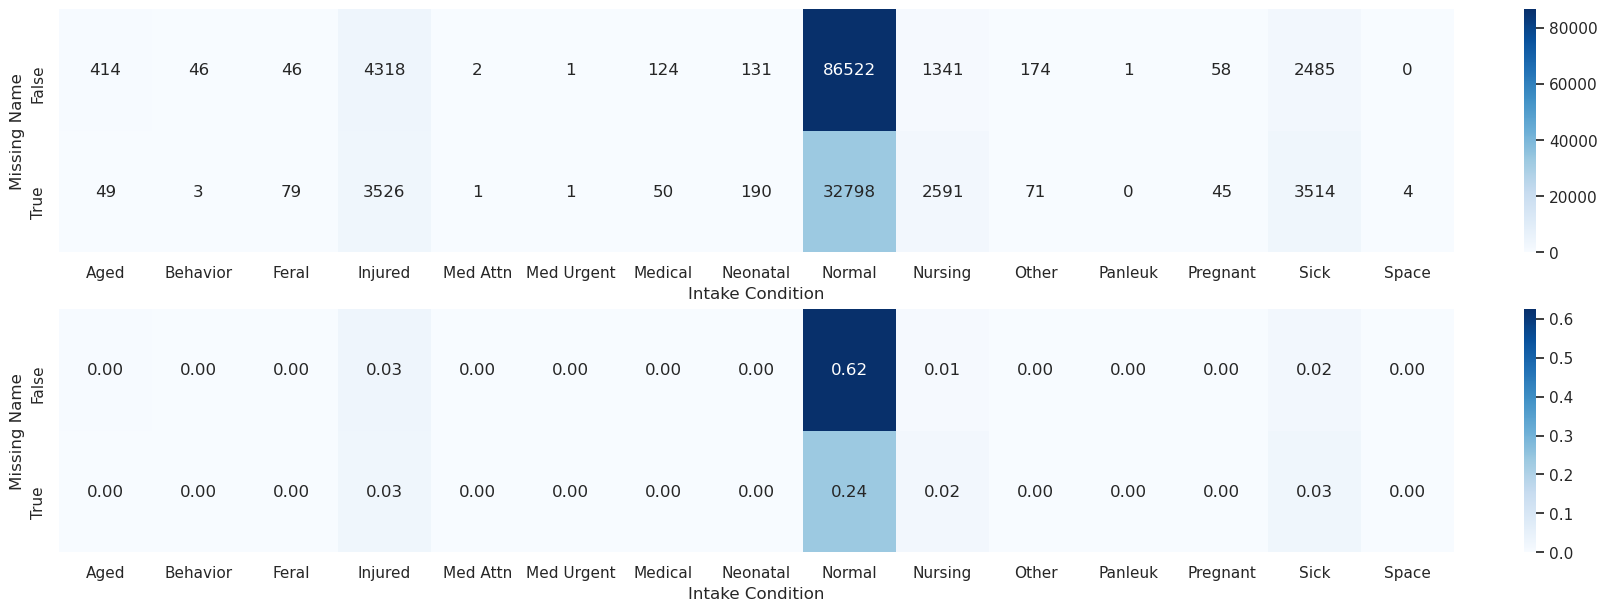

In [1401]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6), constrained_layout=True)

sns.heatmap(freq_table_ic, cmap="Blues", annot=True, fmt="g", ax=ax1)
sns.heatmap(
    freq_table_ic.div(len(df_name_ic_it)), cmap="Blues", annot=True, fmt=".2f", ax=ax2
)

First of all, we see that in Normal condition chances that the animal has name are quite high, but it is hard to judge the rest of the categorical values, because of data inbalacne towards the Normal value. Let's exlude the normal condition and again the results

In [1404]:
df_name_ic_not_normal = df_name_ic_it[df_name_ic_it["Intake Condition"] != "Normal"]
freq_table_ic_not_normal = pd.crosstab(
    df_name_ic_not_normal["Missing Name"], df_name_ic_not_normal["Intake Condition"]
)
freq_table_ic_not_normal

Intake Condition,Aged,Behavior,Feral,Injured,Med Attn,Med Urgent,Medical,Neonatal,Nursing,Other,Panleuk,Pregnant,Sick,Space
Missing Name,,,,,,,,,,,,,,
False,414,46,46,4318,2,1,124,131,1341,174,1,58,2485,0
True,49,3,79,3526,1,1,50,190,2591,71,0,45,3514,4


<AxesSubplot:xlabel='Intake Condition', ylabel='Missing Name'>

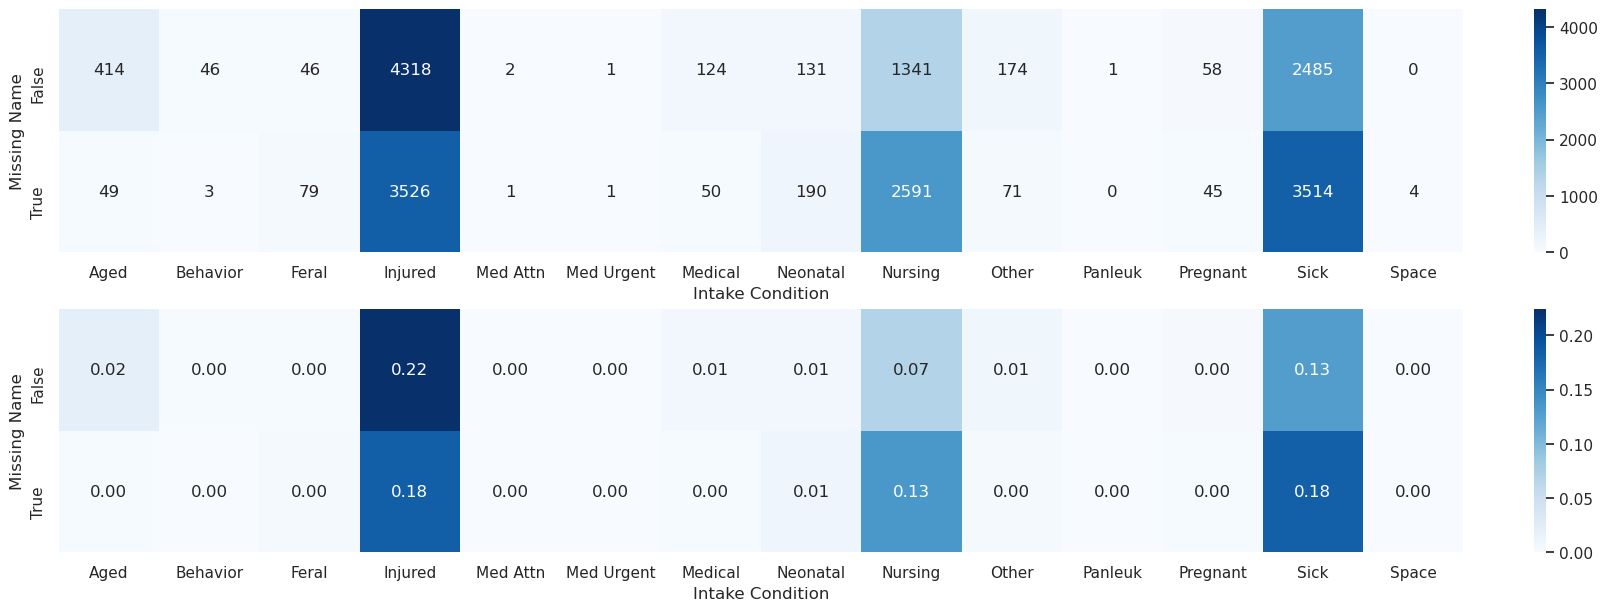

In [1405]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6), constrained_layout=True)

sns.heatmap(freq_table_ic_not_normal, cmap="Blues", annot=True, fmt="g", ax=ax1)
sns.heatmap(
    freq_table_ic_not_normal.div(len(df_name_ic_not_normal)),
    cmap="Blues",
    annot=True,
    fmt=".2f",
    ax=ax2,
)

We can see, that chances are quite aligned along all categories, though some them have more chances to be without name, like Nursing or Sick

Let's finish analysis with the intake type

<AxesSubplot:xlabel='Intake Type', ylabel='Missing Name'>

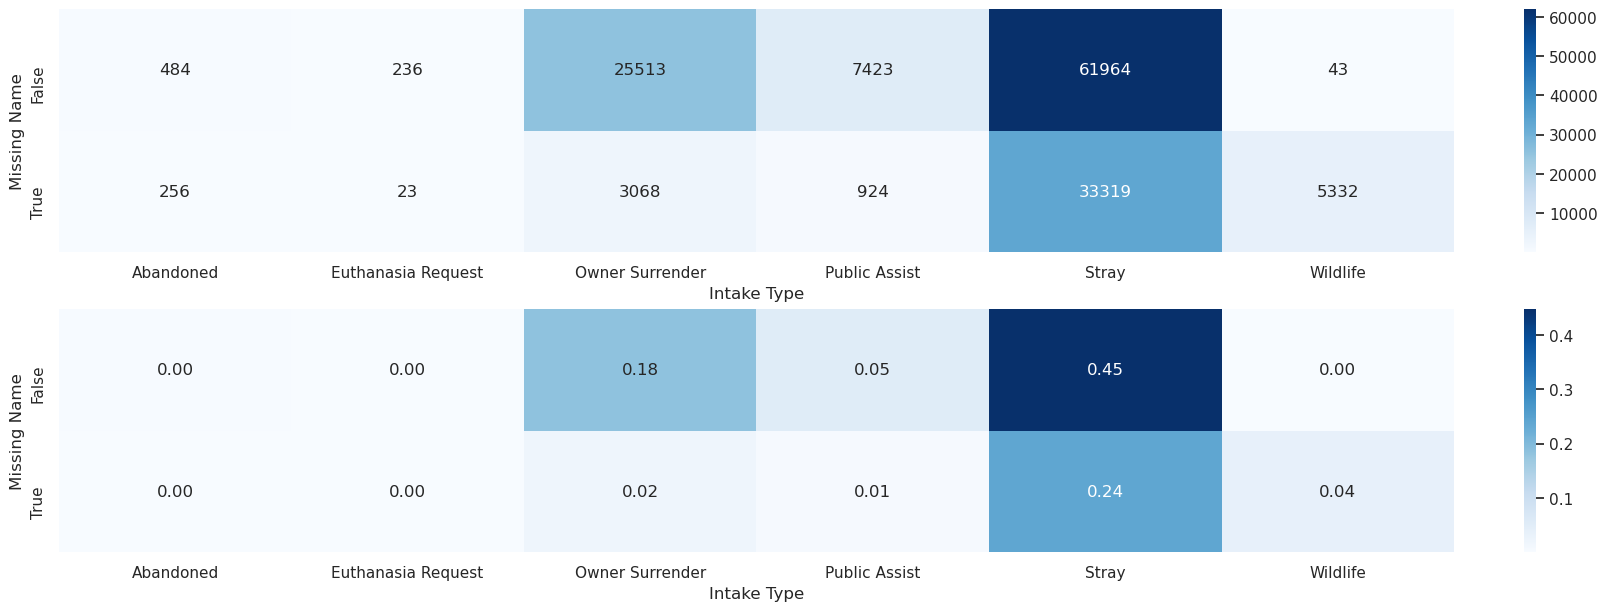

In [1402]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6), constrained_layout=True)

sns.heatmap(freq_table_it, cmap="Blues", annot=True, fmt="g", ax=ax1)
sns.heatmap(
    freq_table_it.div(len(df_name_ic_it)), cmap="Blues", annot=True, fmt=".2f", ax=ax2
)

We can see, that animals that are surrendered by owner have high chance that the animal has name. What is very interesting, stray animals have better chances to have name than miss it.